In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

In [2]:
from matplotlib import font_manager, rc

font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

#### Iris 데이터 loading

In [3]:
def get_iris_df():
  ds = sklearn.datasets.load_iris()
  df = pd.DataFrame(ds['data'],
    columns = ds['feature_names'])
  code_species_map = dict(zip(
    range(3), ds['target_names']))
  df['species'] = [code_species_map[c]
    for c in ds['target']]
  return df
df = get_iris_df()

#### Pie charts

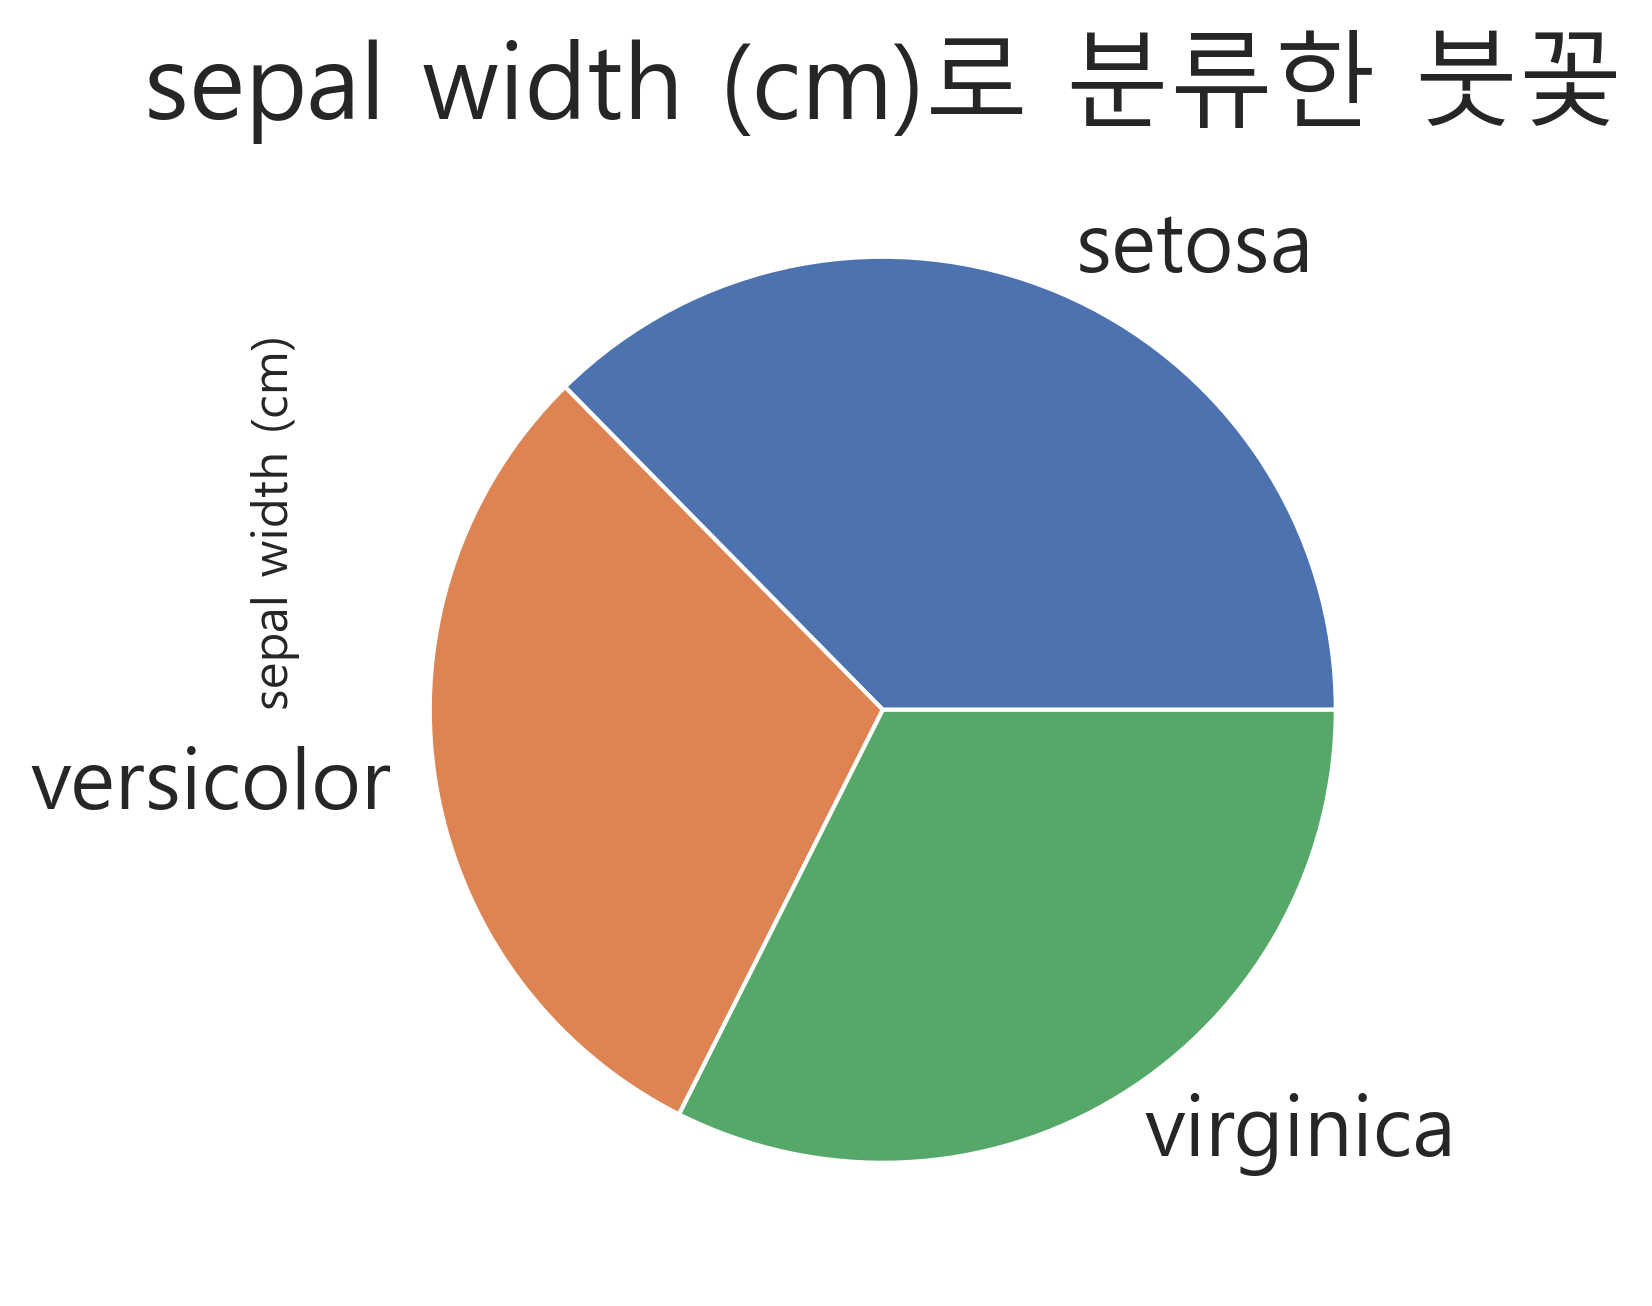

In [4]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title(var+'로 분류한 붓꽃', fontsize=25)
plt.show()
plt.savefig('iris_pie_for_one_variable.jpg')
plt.close()

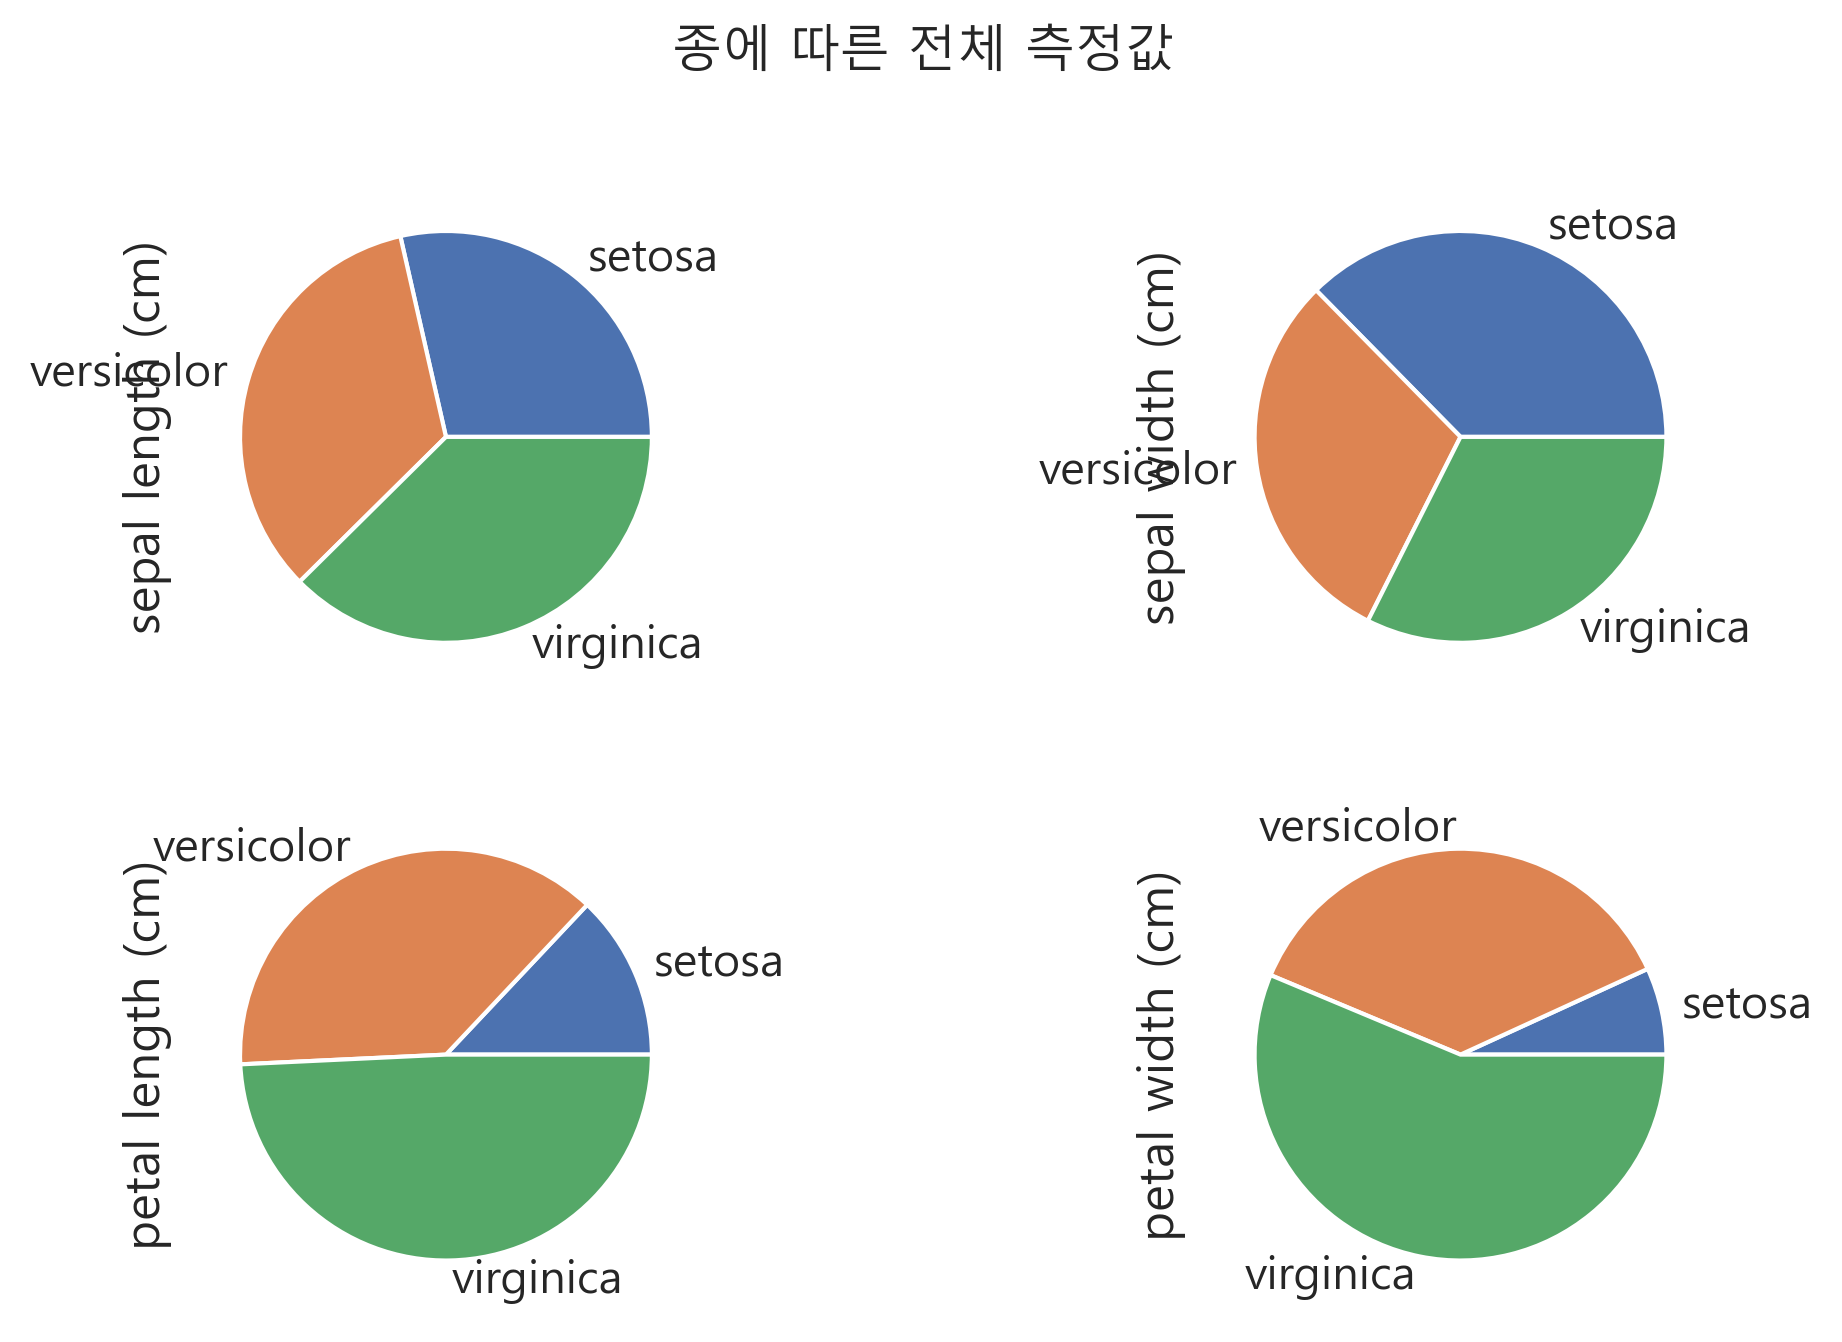

In [5]:
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True,layout=(2,2), legend=False)
plt.suptitle('종에 따른 전체 측정값')
#plt.title('종에 따른 전체 측정값')
plt.show()
plt.savefig('iris_pie_for_each_variable.jpg')
plt.close()

#### 막대 그래프

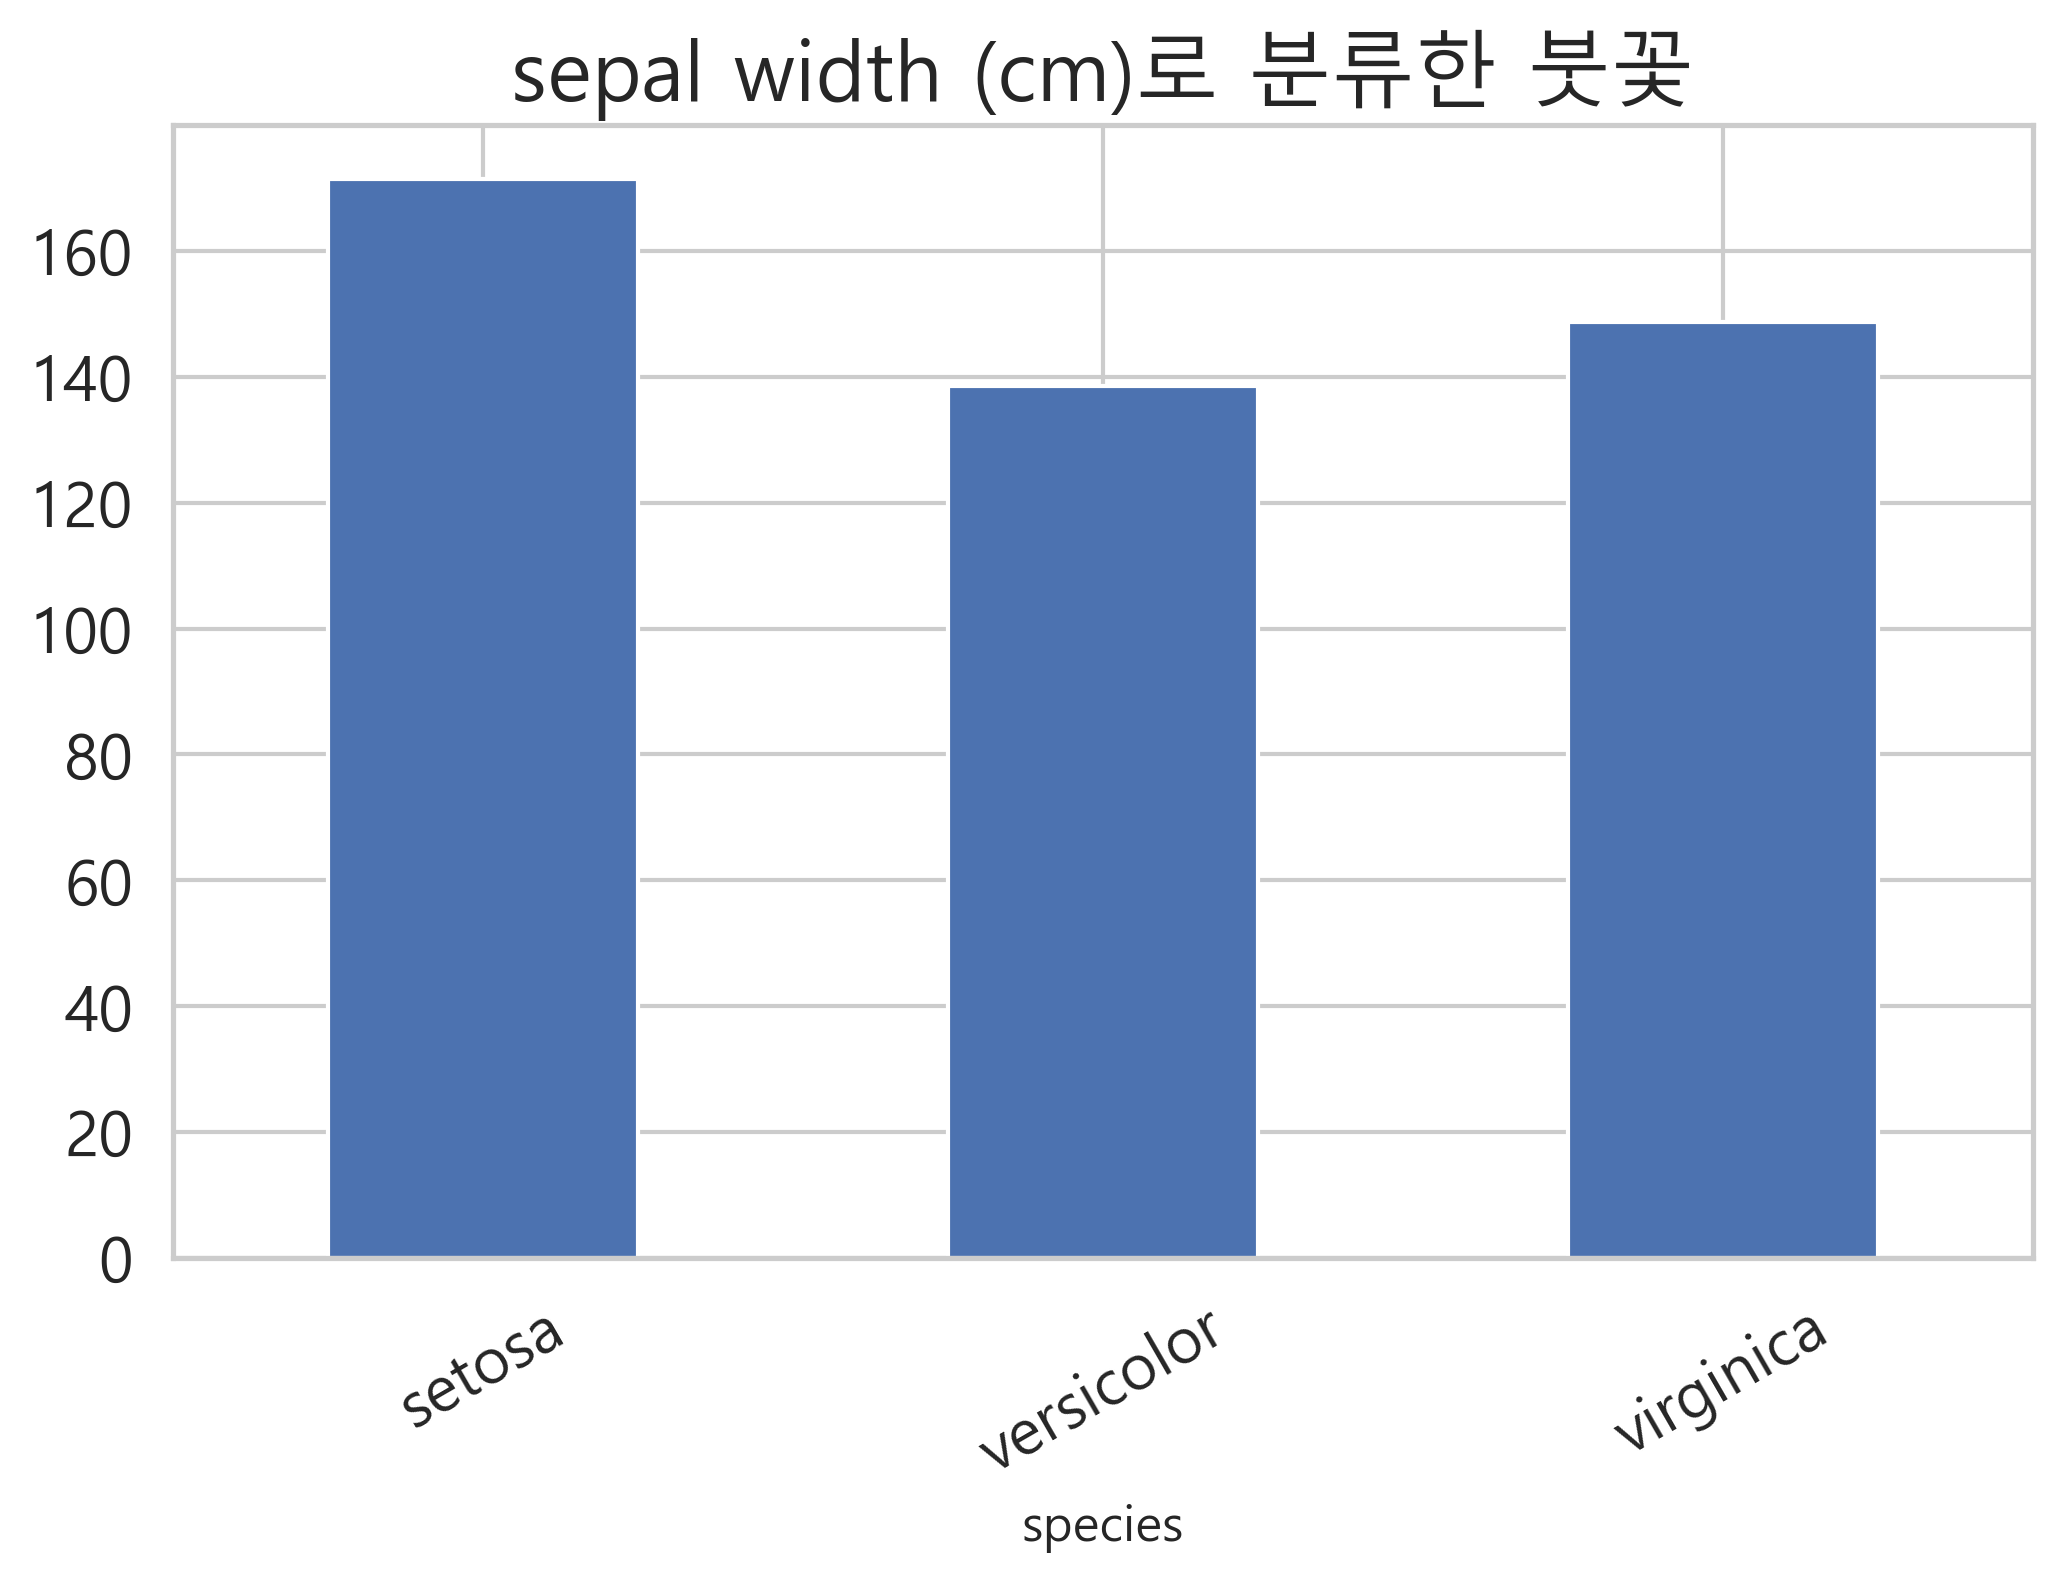

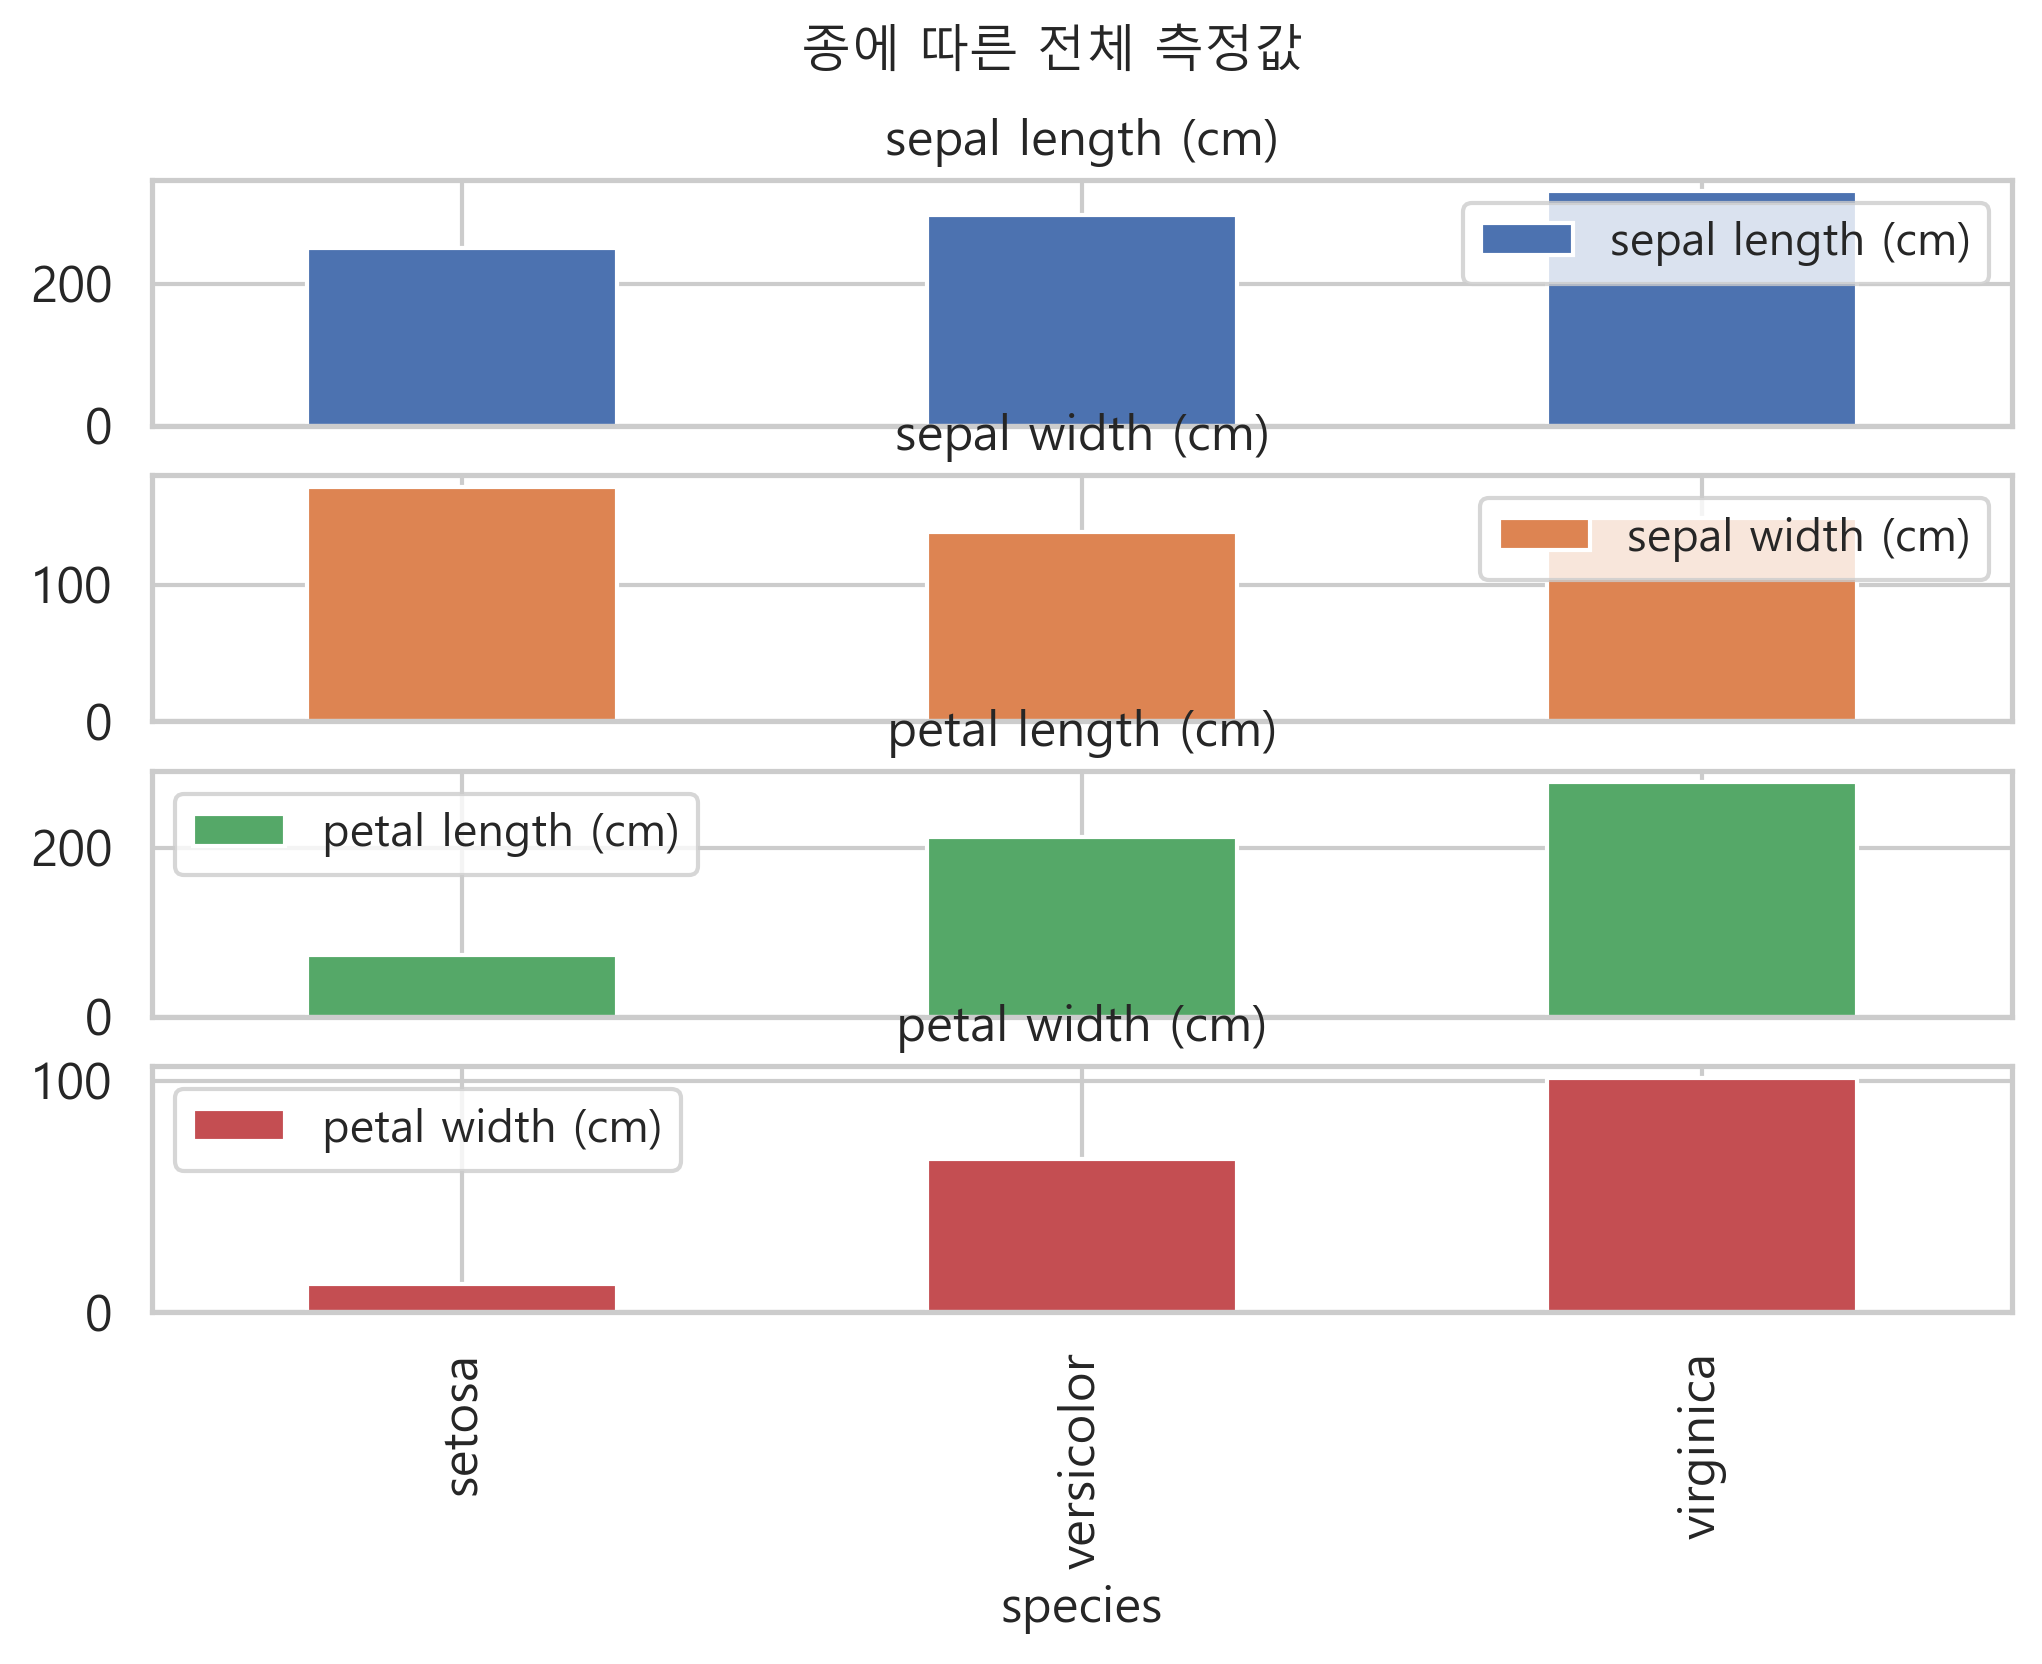

In [6]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=15,rot=30)

plt.title(var+'로 분류한 붓꽃', fontsize=20)
plt.show()
plt.savefig('iris_bar_for_one_variable.jpg')
plt.close()

sums_by_species = df.groupby('species').sum()
sums_by_species.plot(
    kind='bar', subplots=True, fontsize=12)
plt.suptitle('종에 따른 전체 측정값')
plt.show()
plt.savefig('iris_bar_for_each_variable.jpg')
plt.close()

#### Histograms

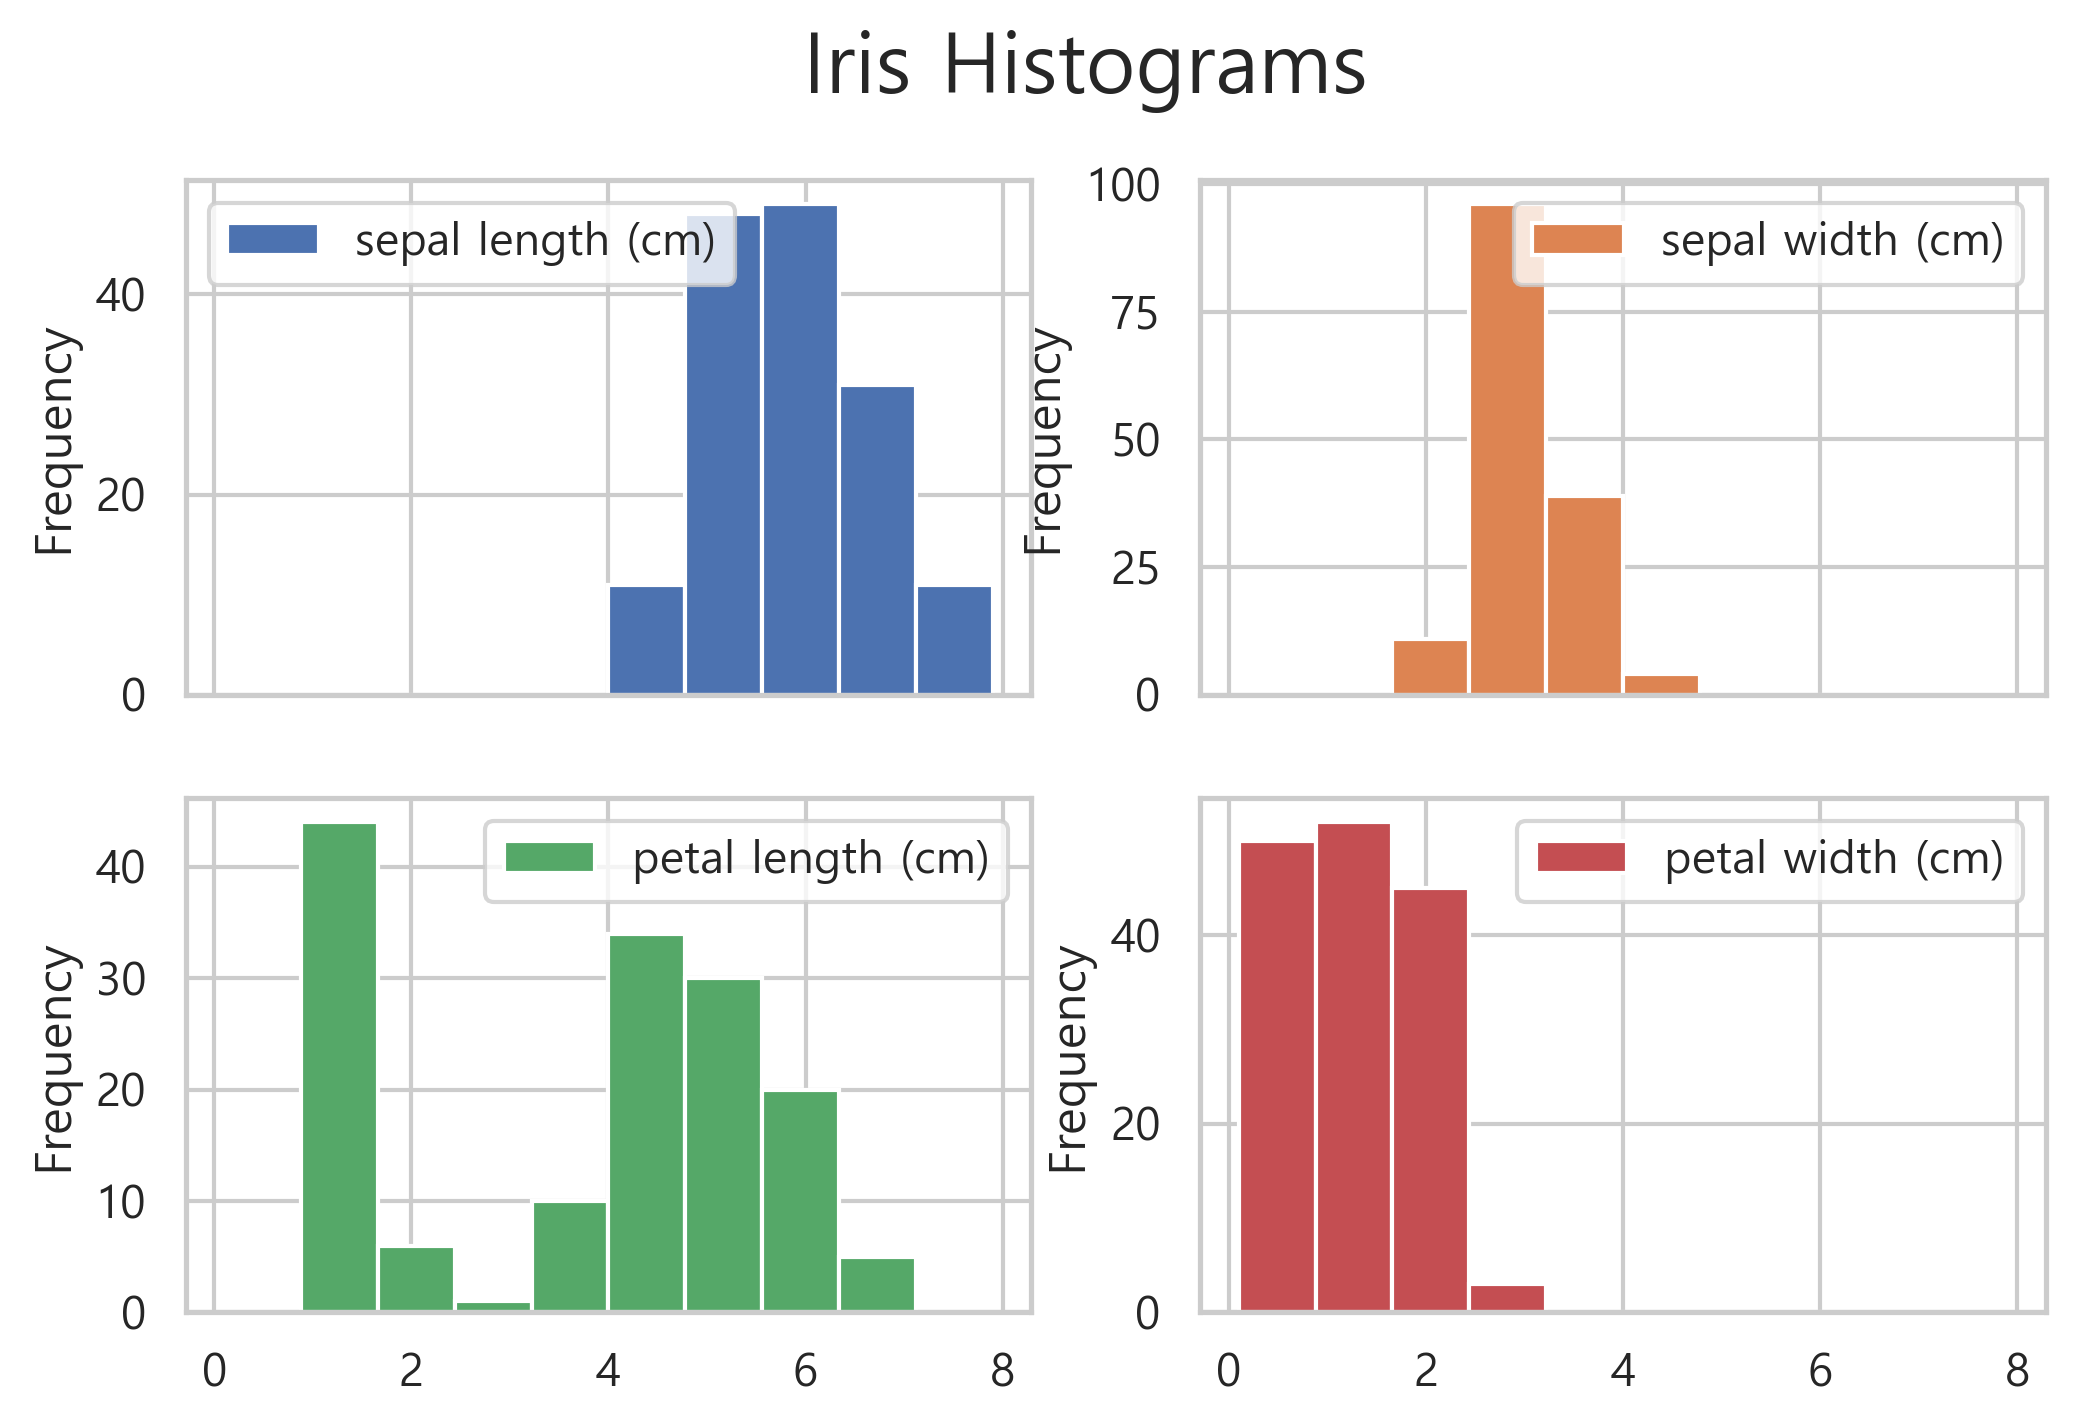

In [7]:
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Iris Histograms', fontsize=20)
plt.show()

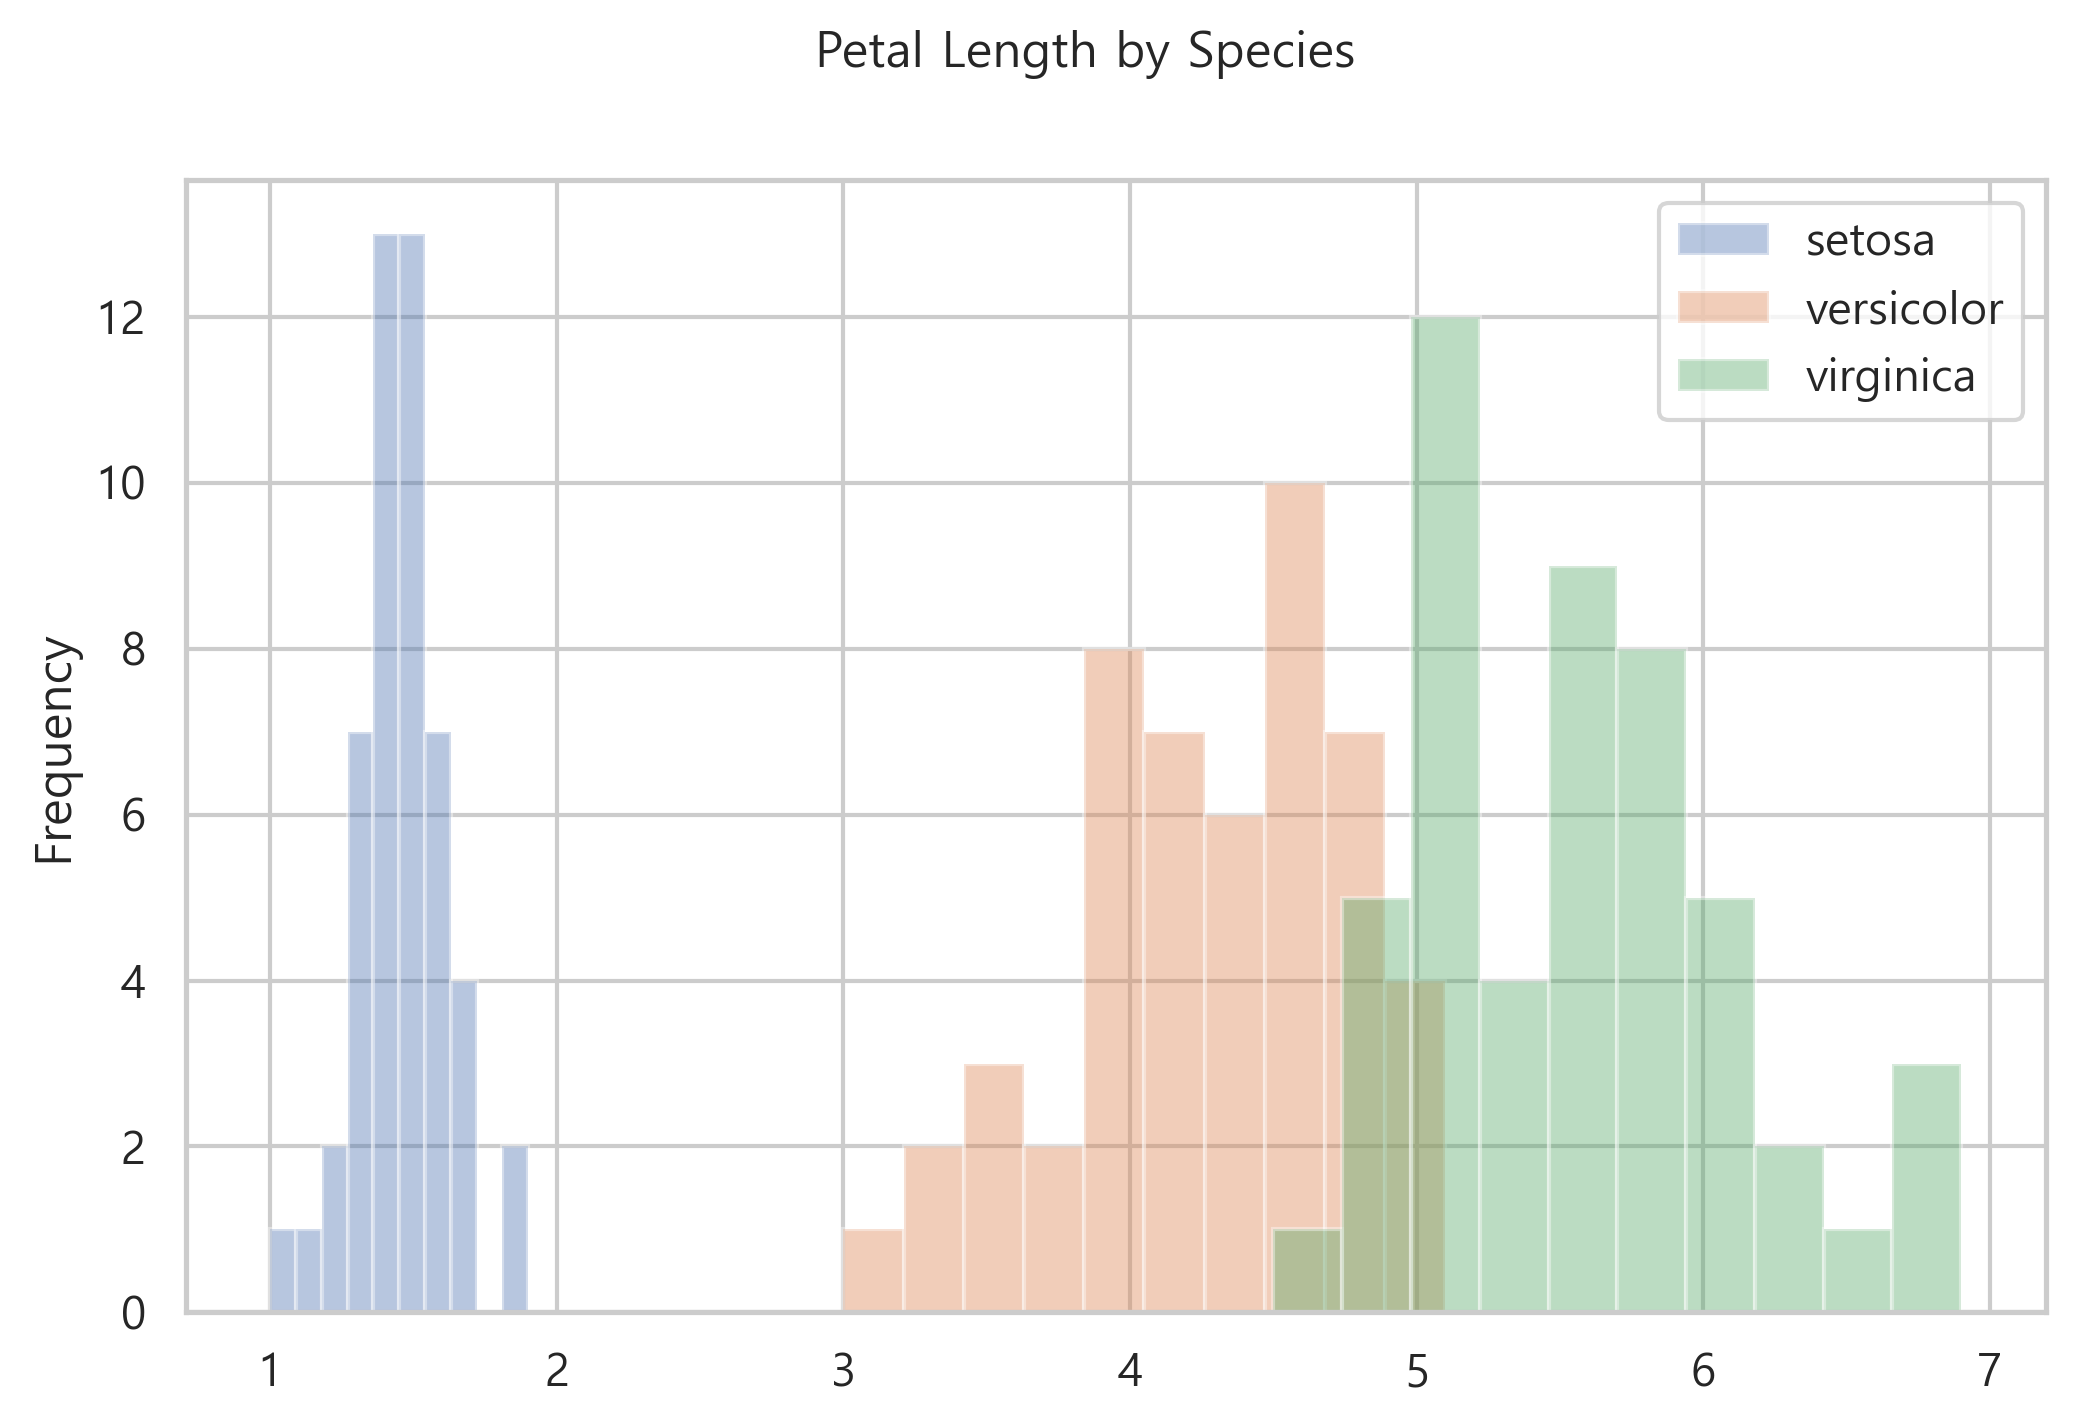

<Figure size 2400x1500 with 0 Axes>

In [8]:
for spec in df['species'].unique():
  forspec = df[df['species']==spec]
  forspec['petal length (cm)'].plot(
    kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')
plt.suptitle('Petal Length by Species')
plt.show()
plt.savefig('iris_hist_by_spec.jpg')

#### 통계량(기술통계): 평균, 표준편차, 중간값, 백분위

In [9]:
col = df['petal length (cm)']
Average = col.mean()
Std = col.std()
Median = col.quantile(0.5)
Percentile25 = col.quantile(0.25)
Percentile75 = col.quantile(0.75)

col = df['petal length (cm)']
Perc25 = col.quantile(0.25)
Perc75 = col.quantile(0.75)
Clean_Avg = col[(col>Perc25)&(col<Perc75)].mean()

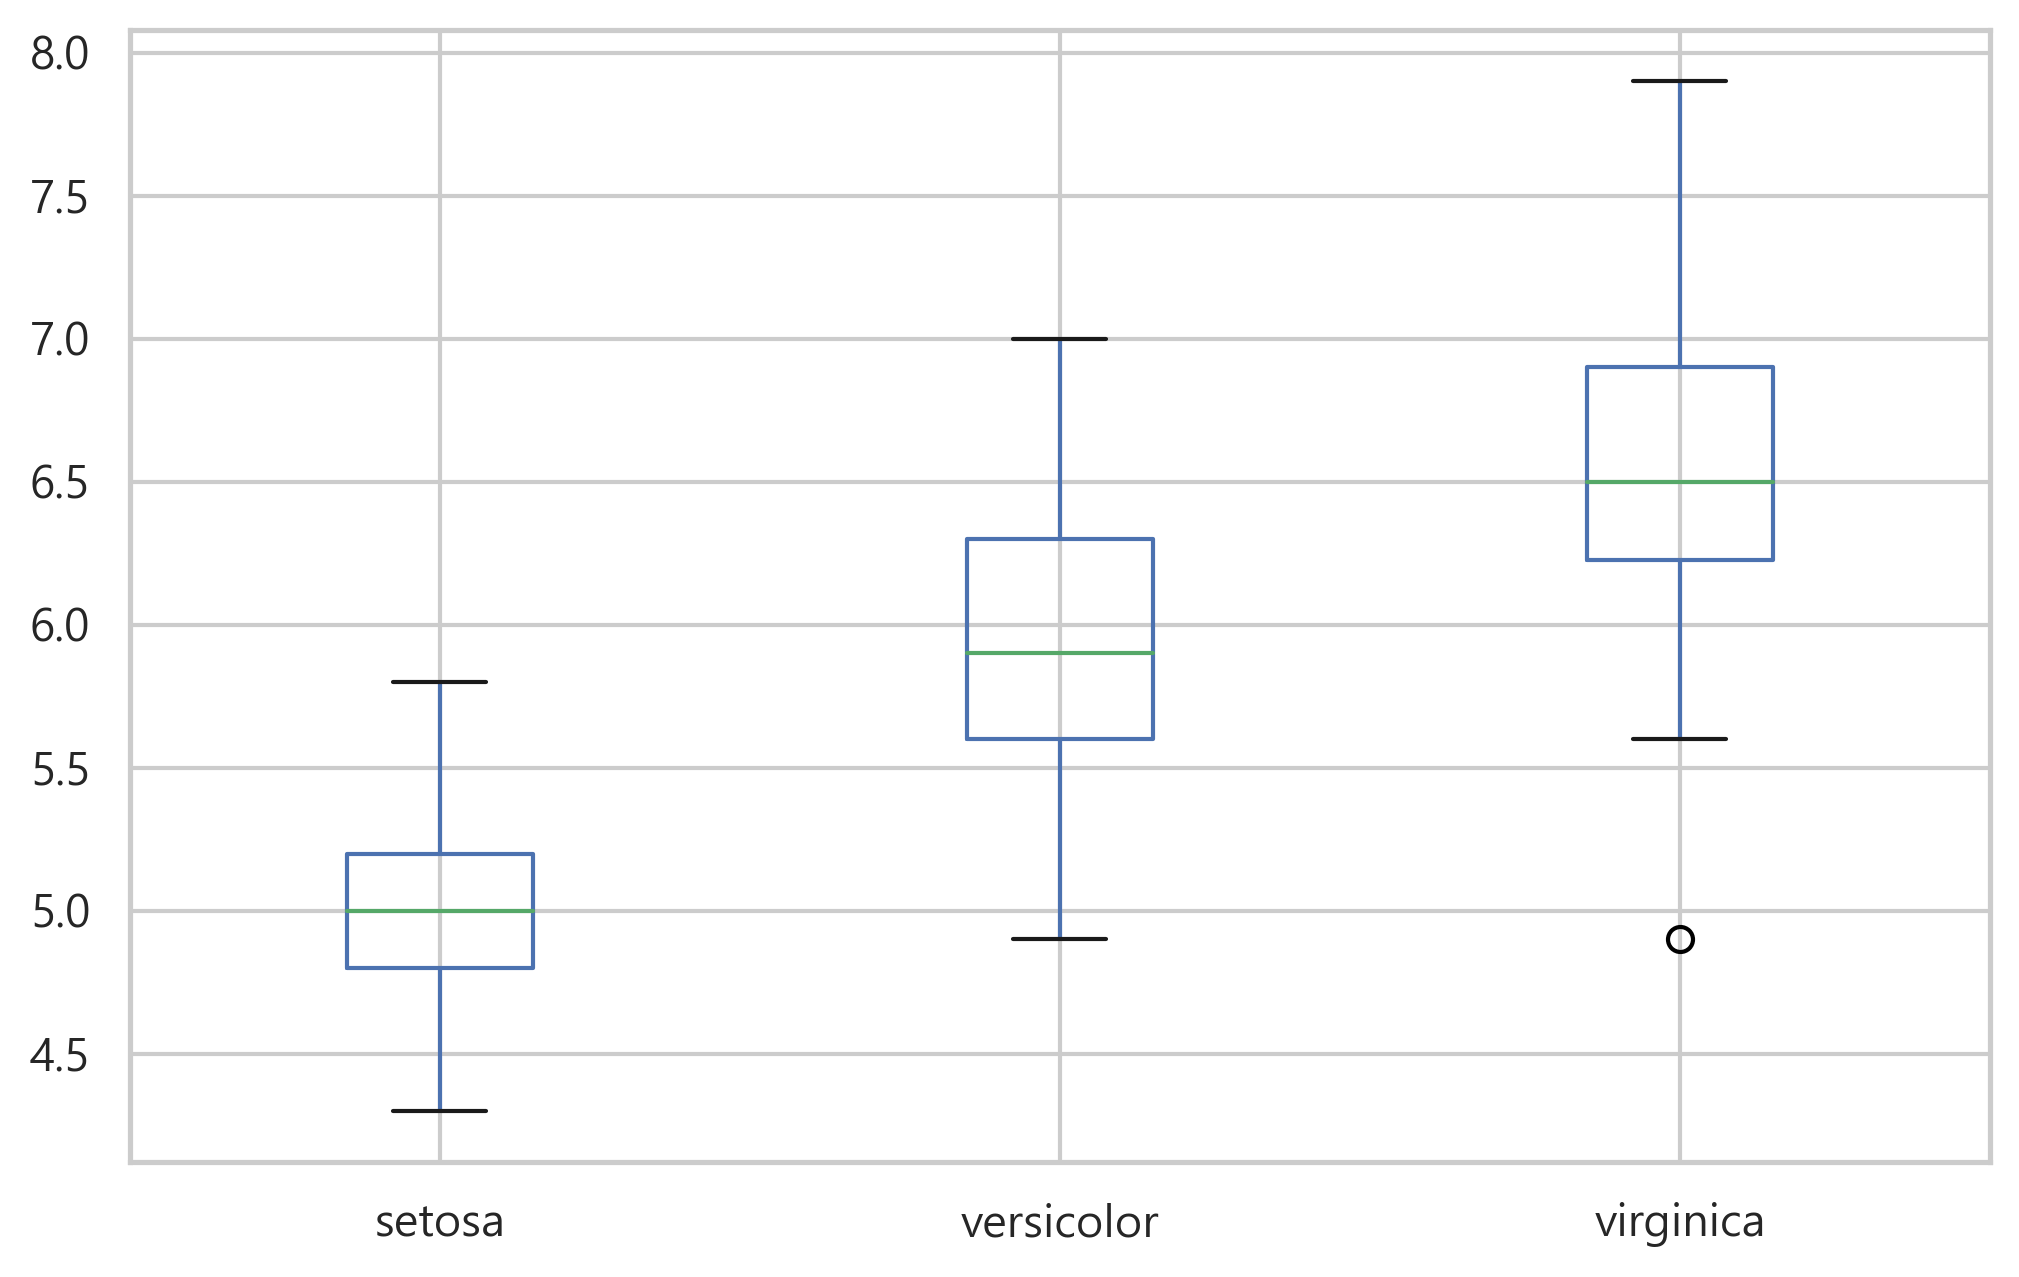

In [10]:
col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind='box')
plt.show()

#### 산포도

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


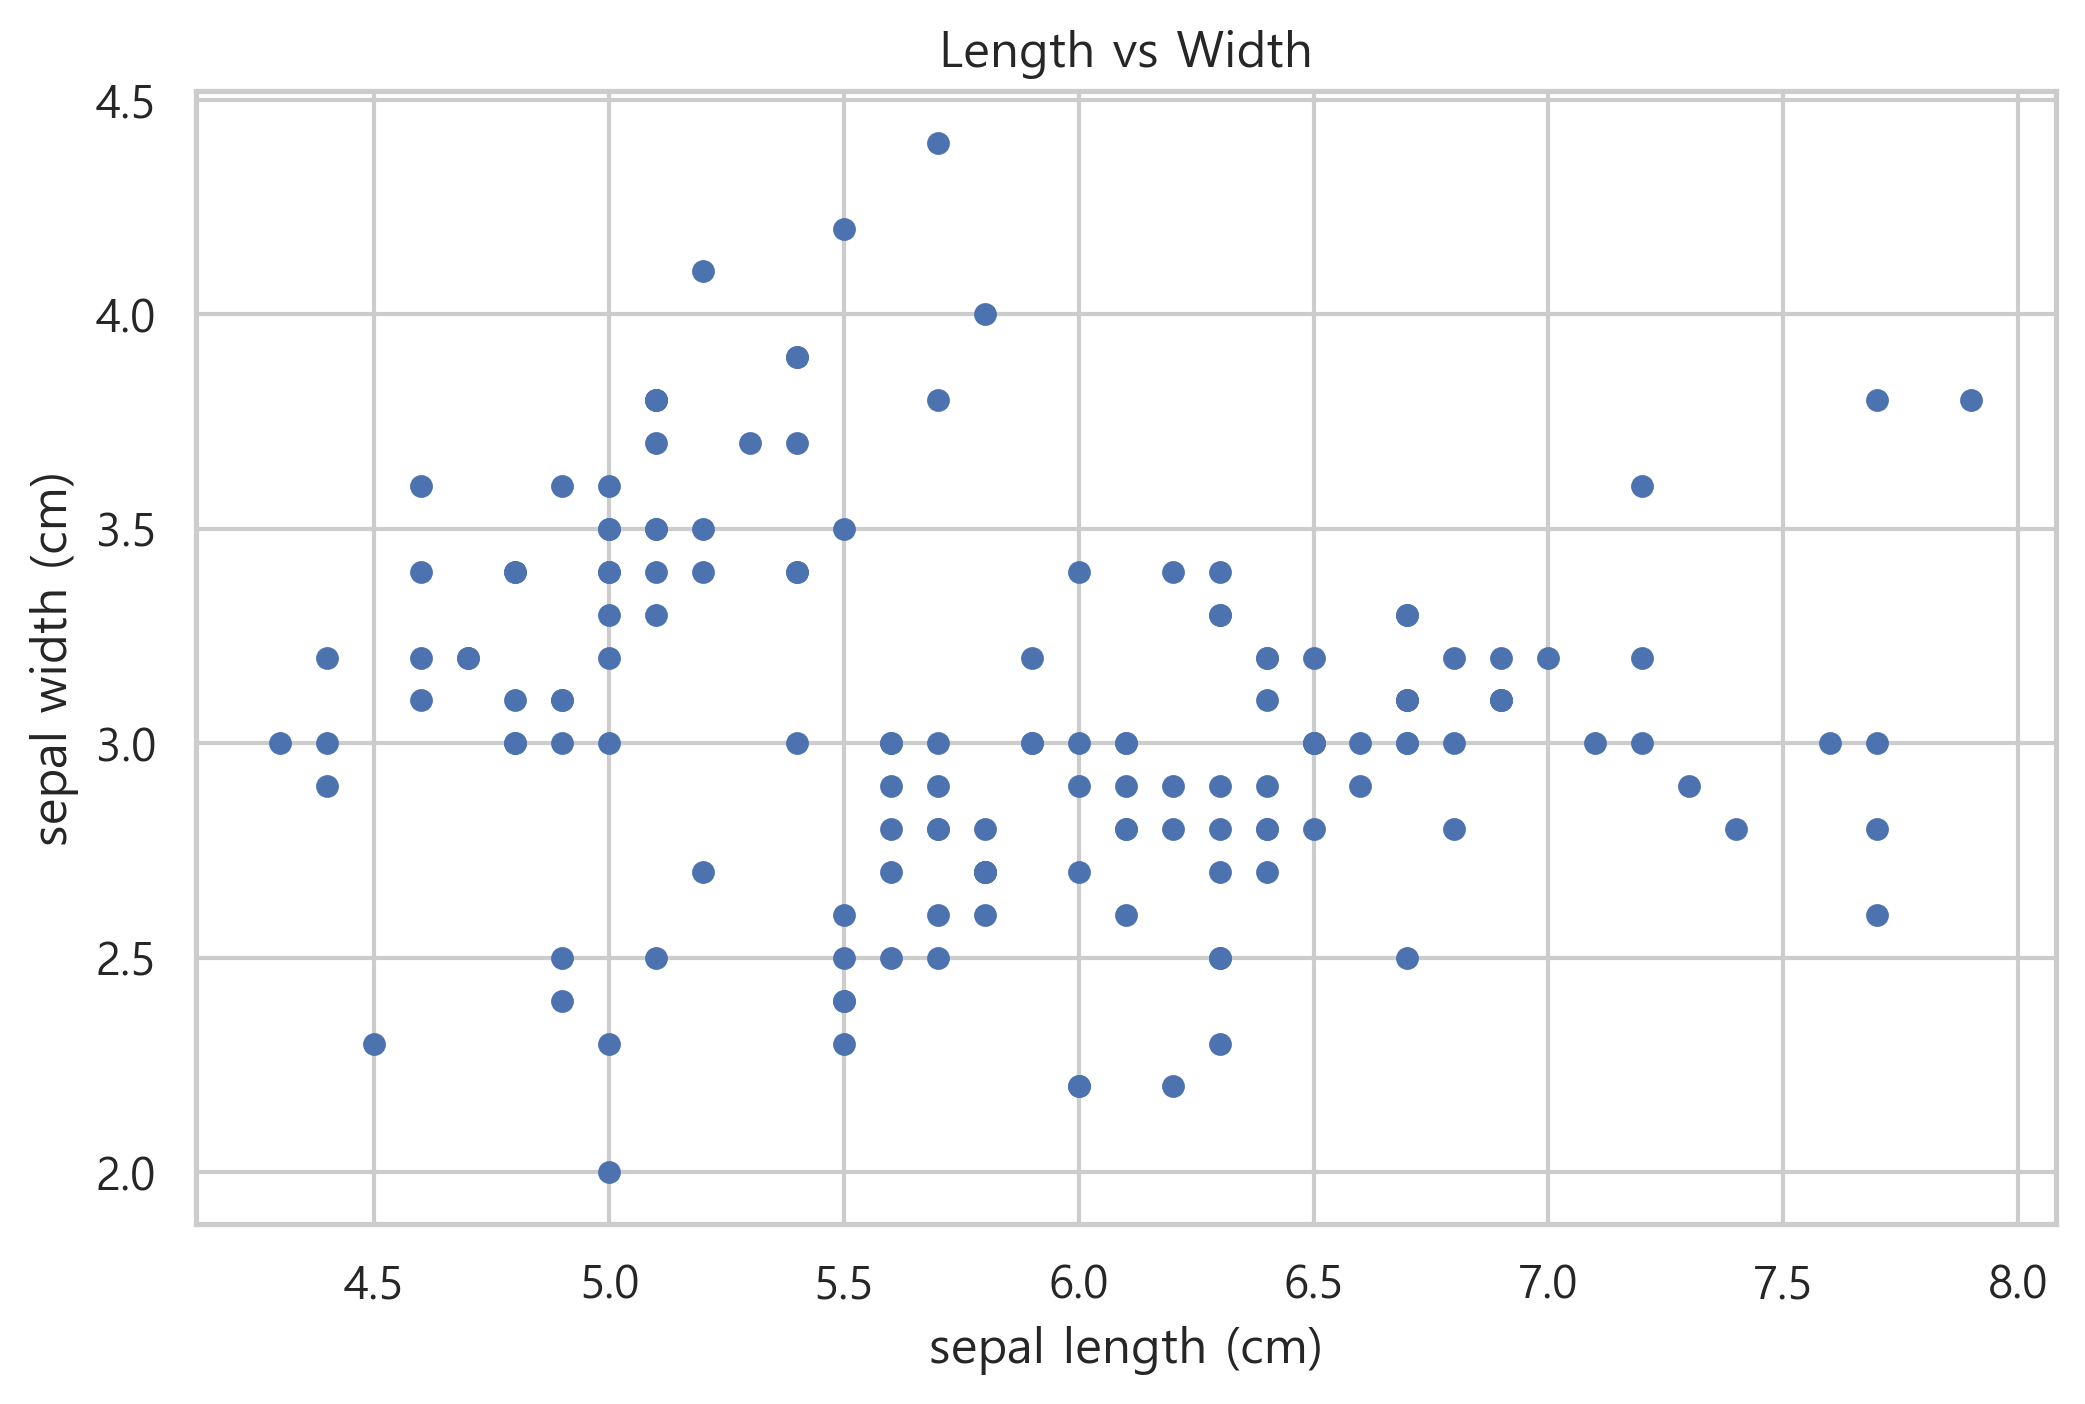

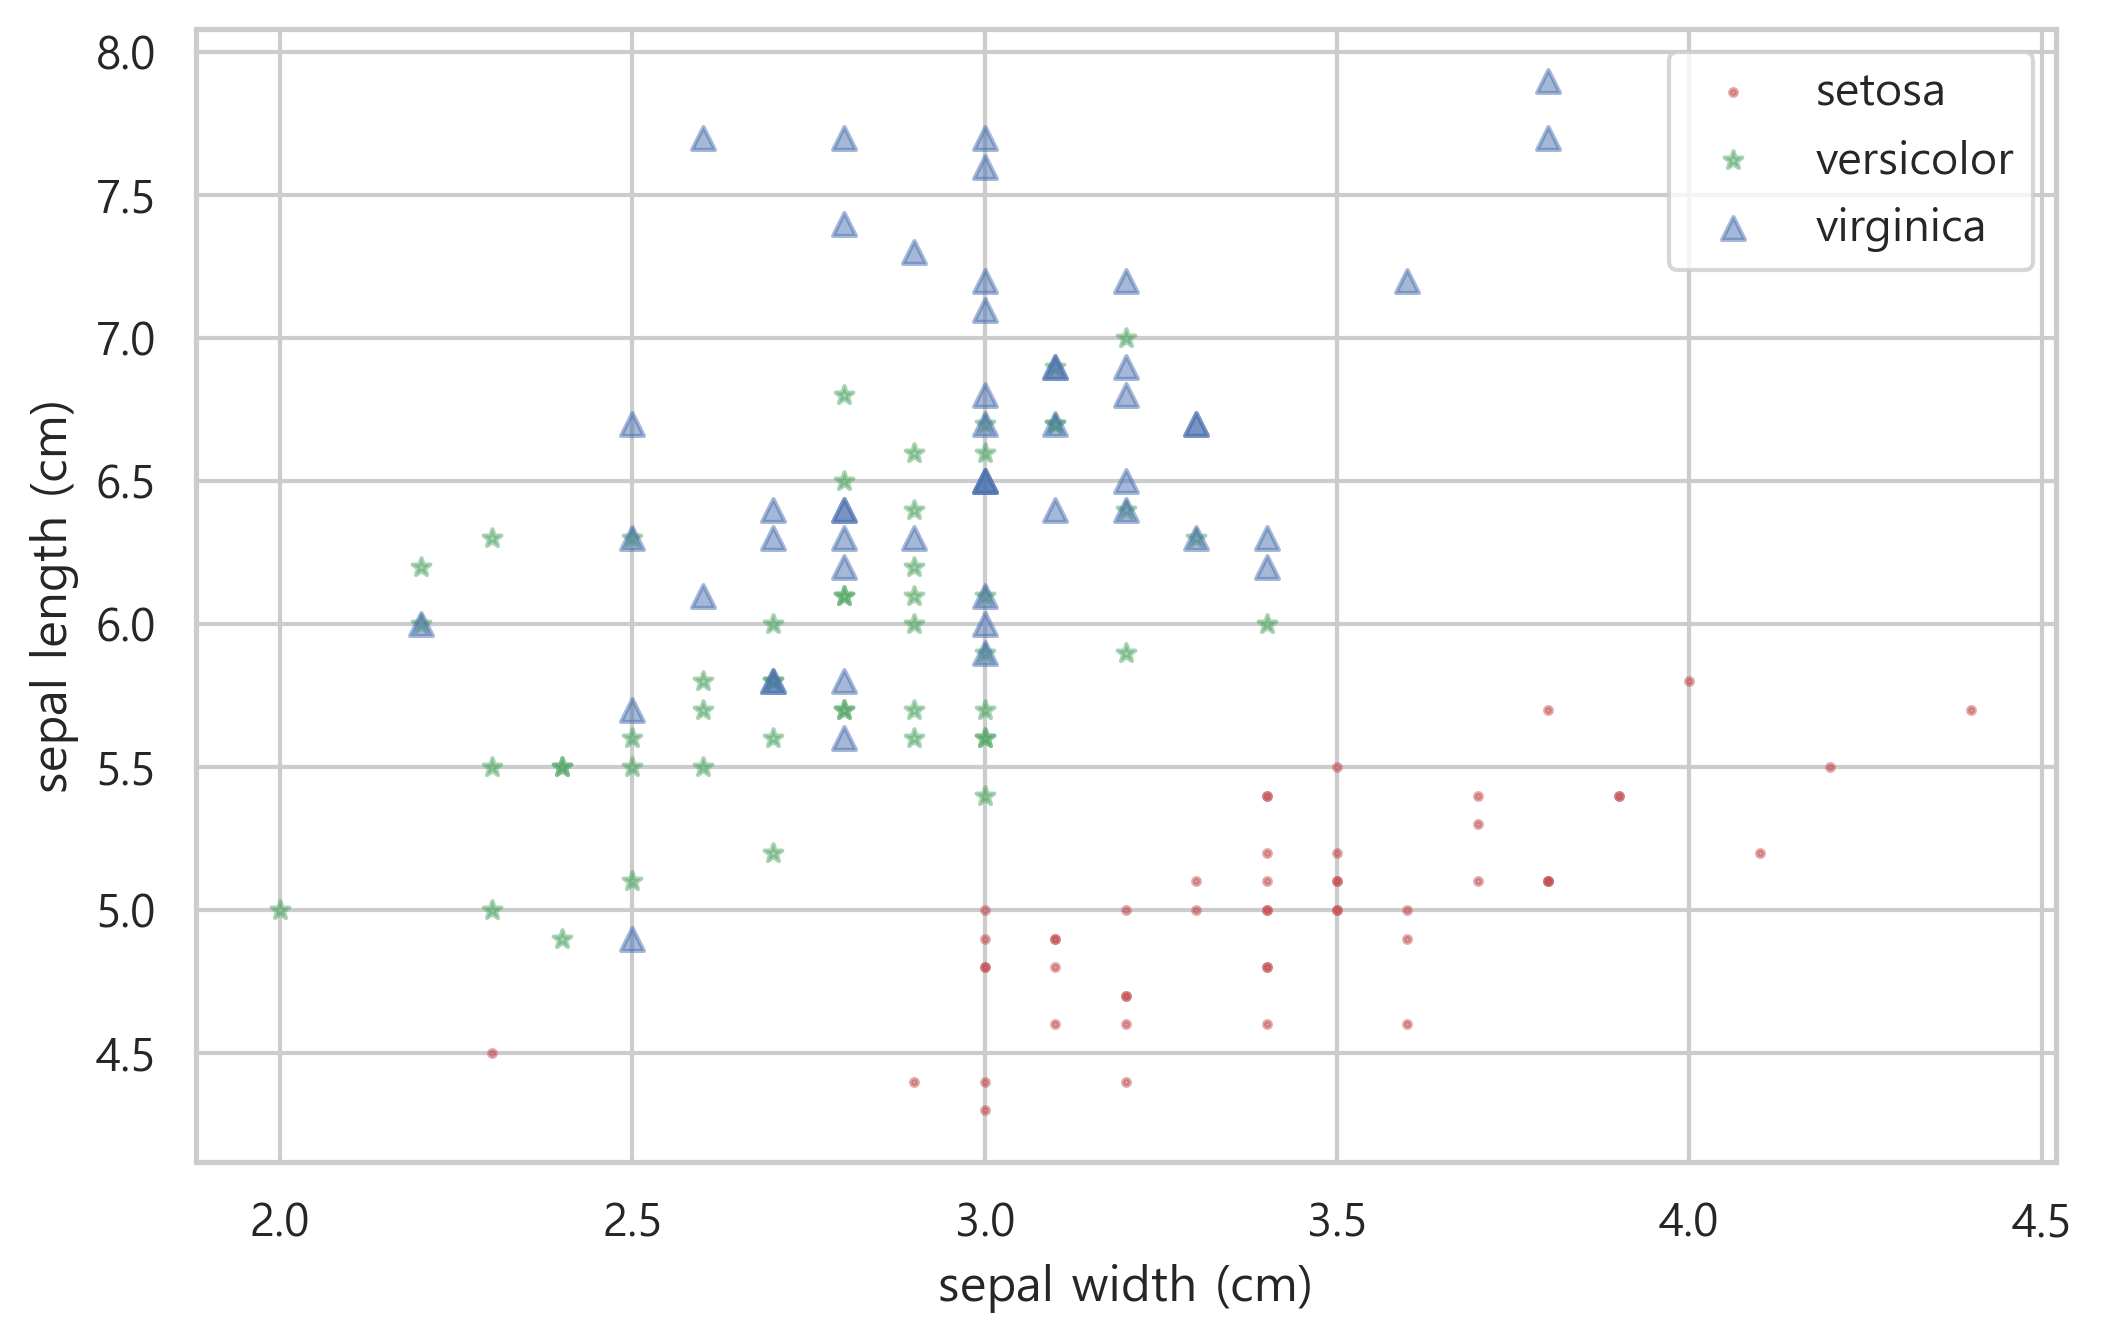

In [11]:
df.plot(kind="scatter",
    x="sepal length (cm)", y="sepal width (cm)")
plt.title("Length vs Width")
plt.show()
plt.close()

colors = ["r", "g", "b"]
markers= [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique() ):
  ddf = df[df['species']==spec]
  ddf.plot(kind="scatter",
    x="sepal width (cm)", y="sepal length (cm)",
    alpha=0.5, s=10*(i+1), ax=ax,
    color=colors[i], marker=markers[i], label=spec)
plt.legend()
plt.show()

#### Scatterplots with logs

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


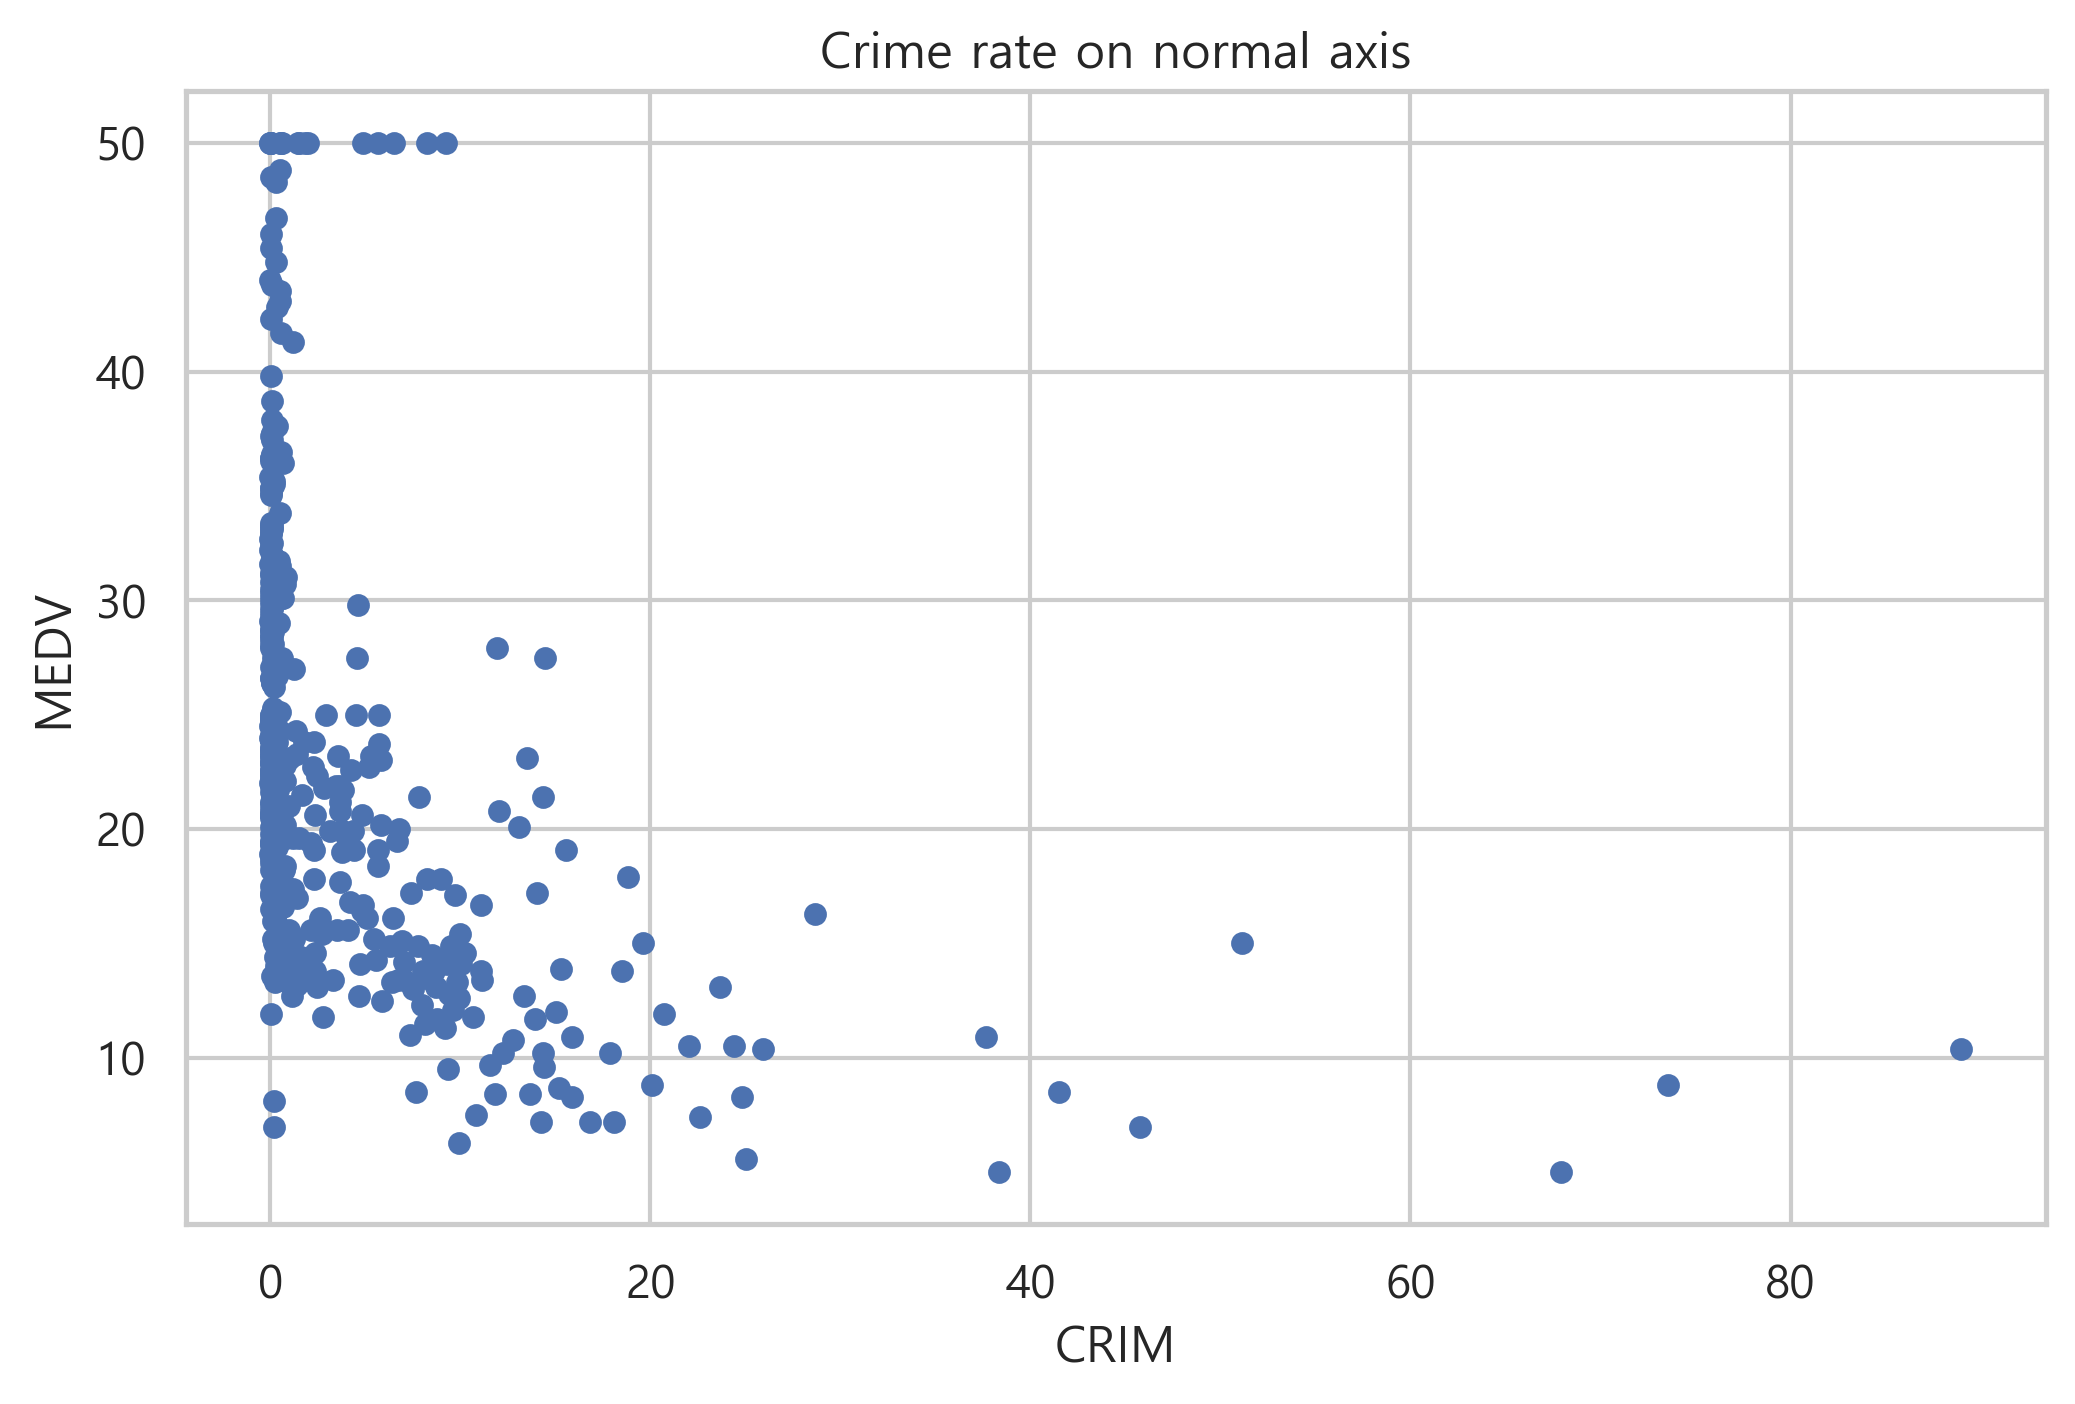

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], subs

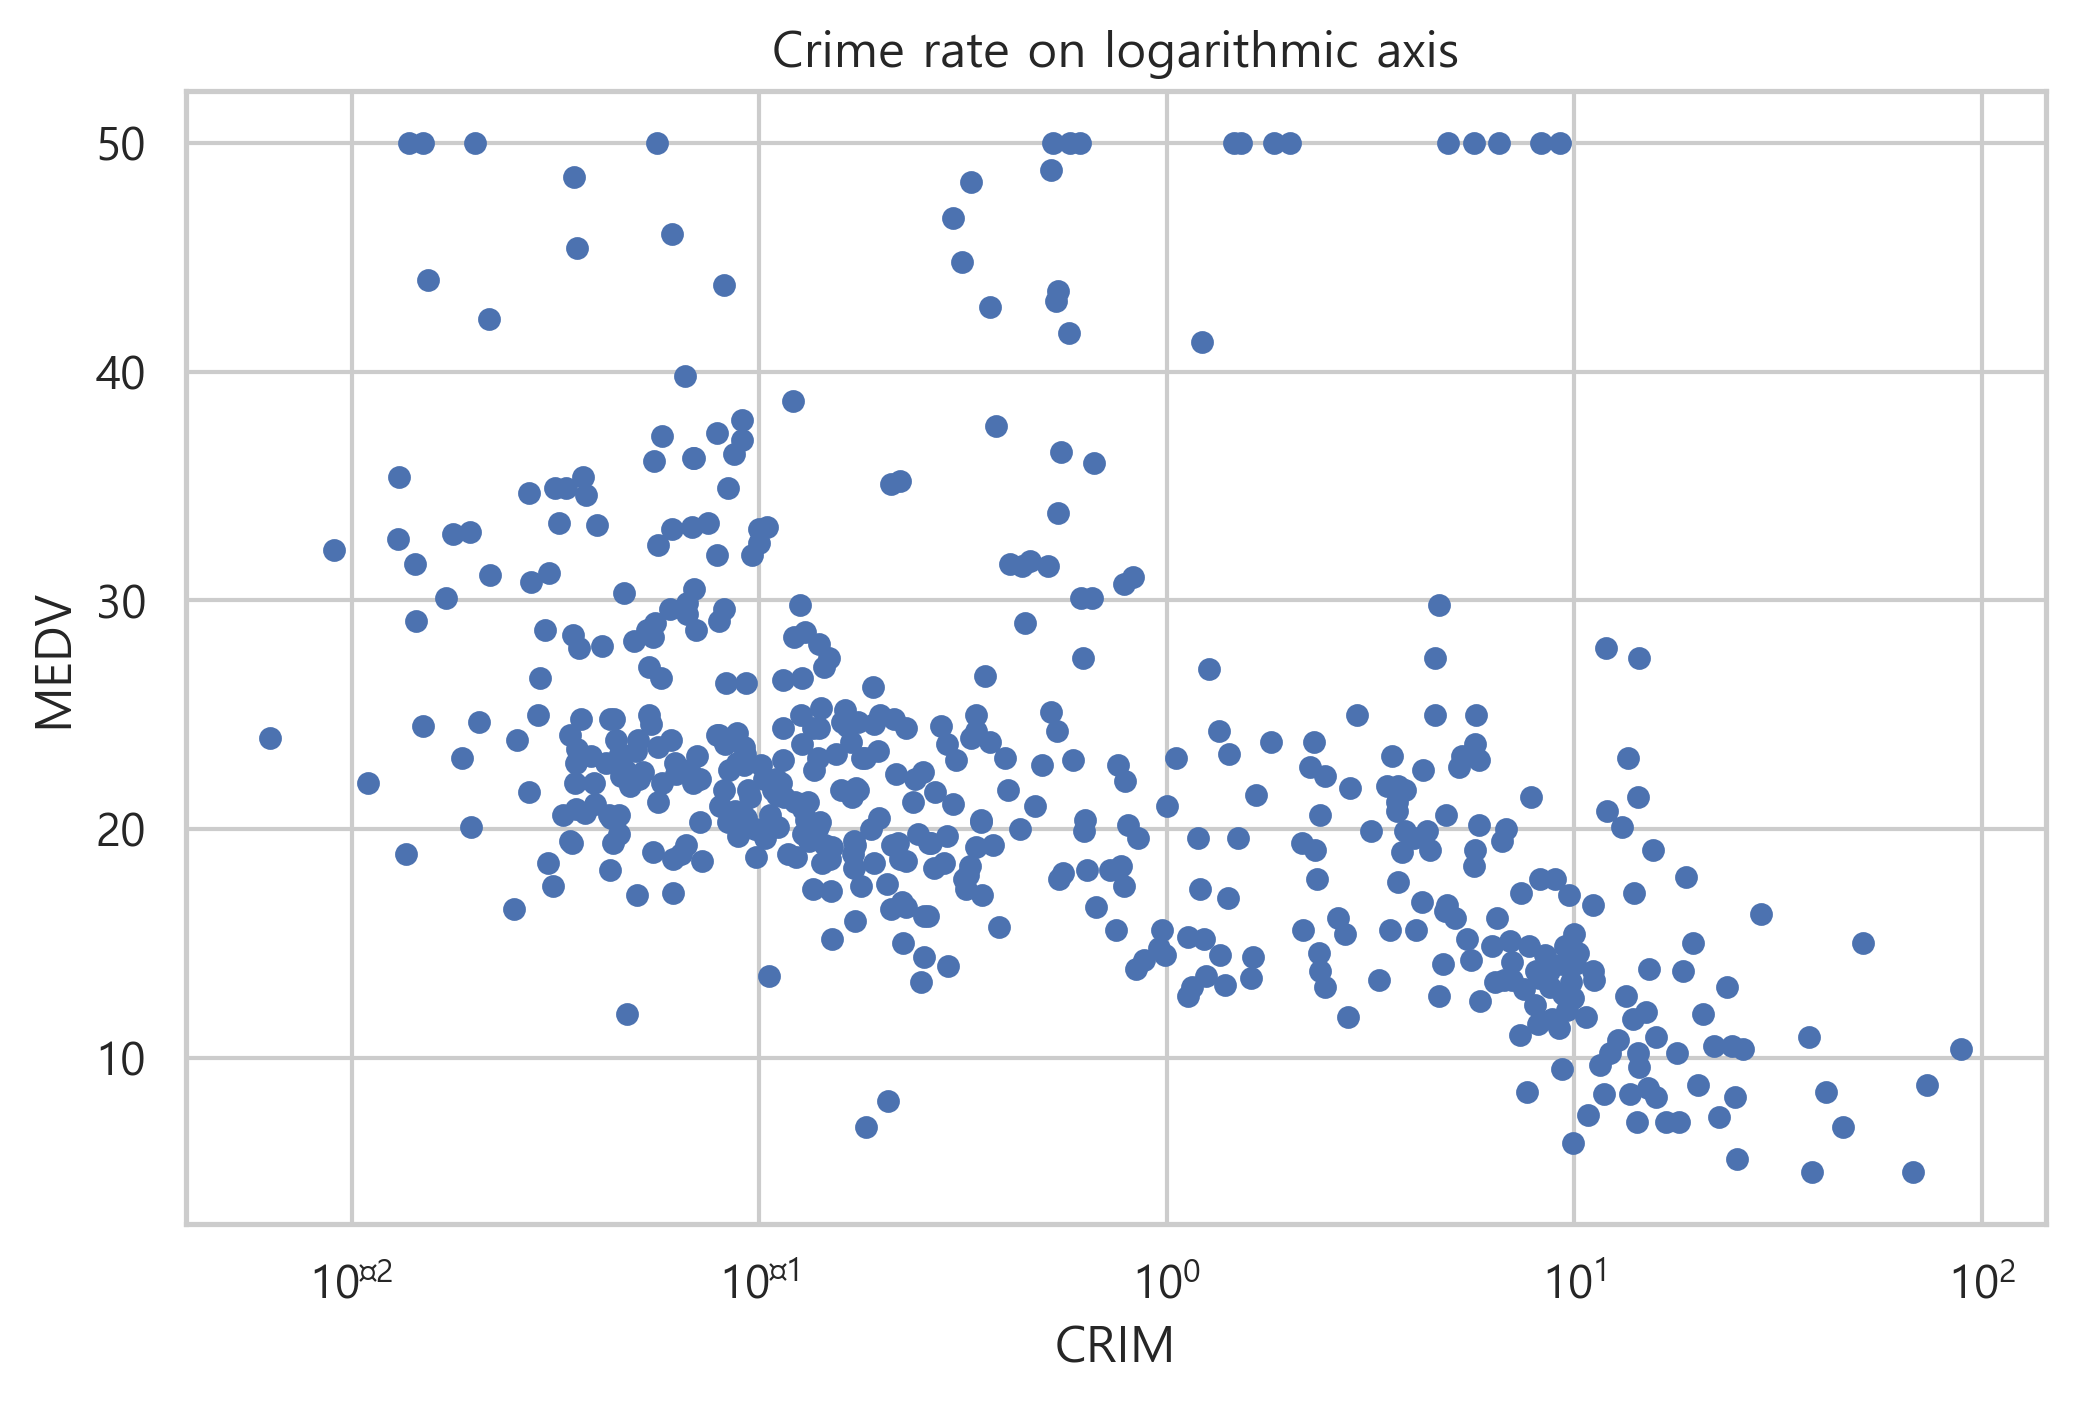

In [12]:
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt

# Make Pandas dataframe
bs = ds.load_boston()
df = pd.DataFrame(bs.data, columns=bs.feature_names)
df['MEDV'] = bs.target

# Normal Scatterplot
df.plot(x='CRIM', y='MEDV', kind='scatter', logx=False)
plt.title('Crime rate on normal axis')
plt.show()

# Normal Scatterplot
df.plot(x='CRIM', y='MEDV', kind='scatter', logx=True)
plt.title('Crime rate on logarithmic axis')
plt.show()
plt.close()

#### Scatter matrices

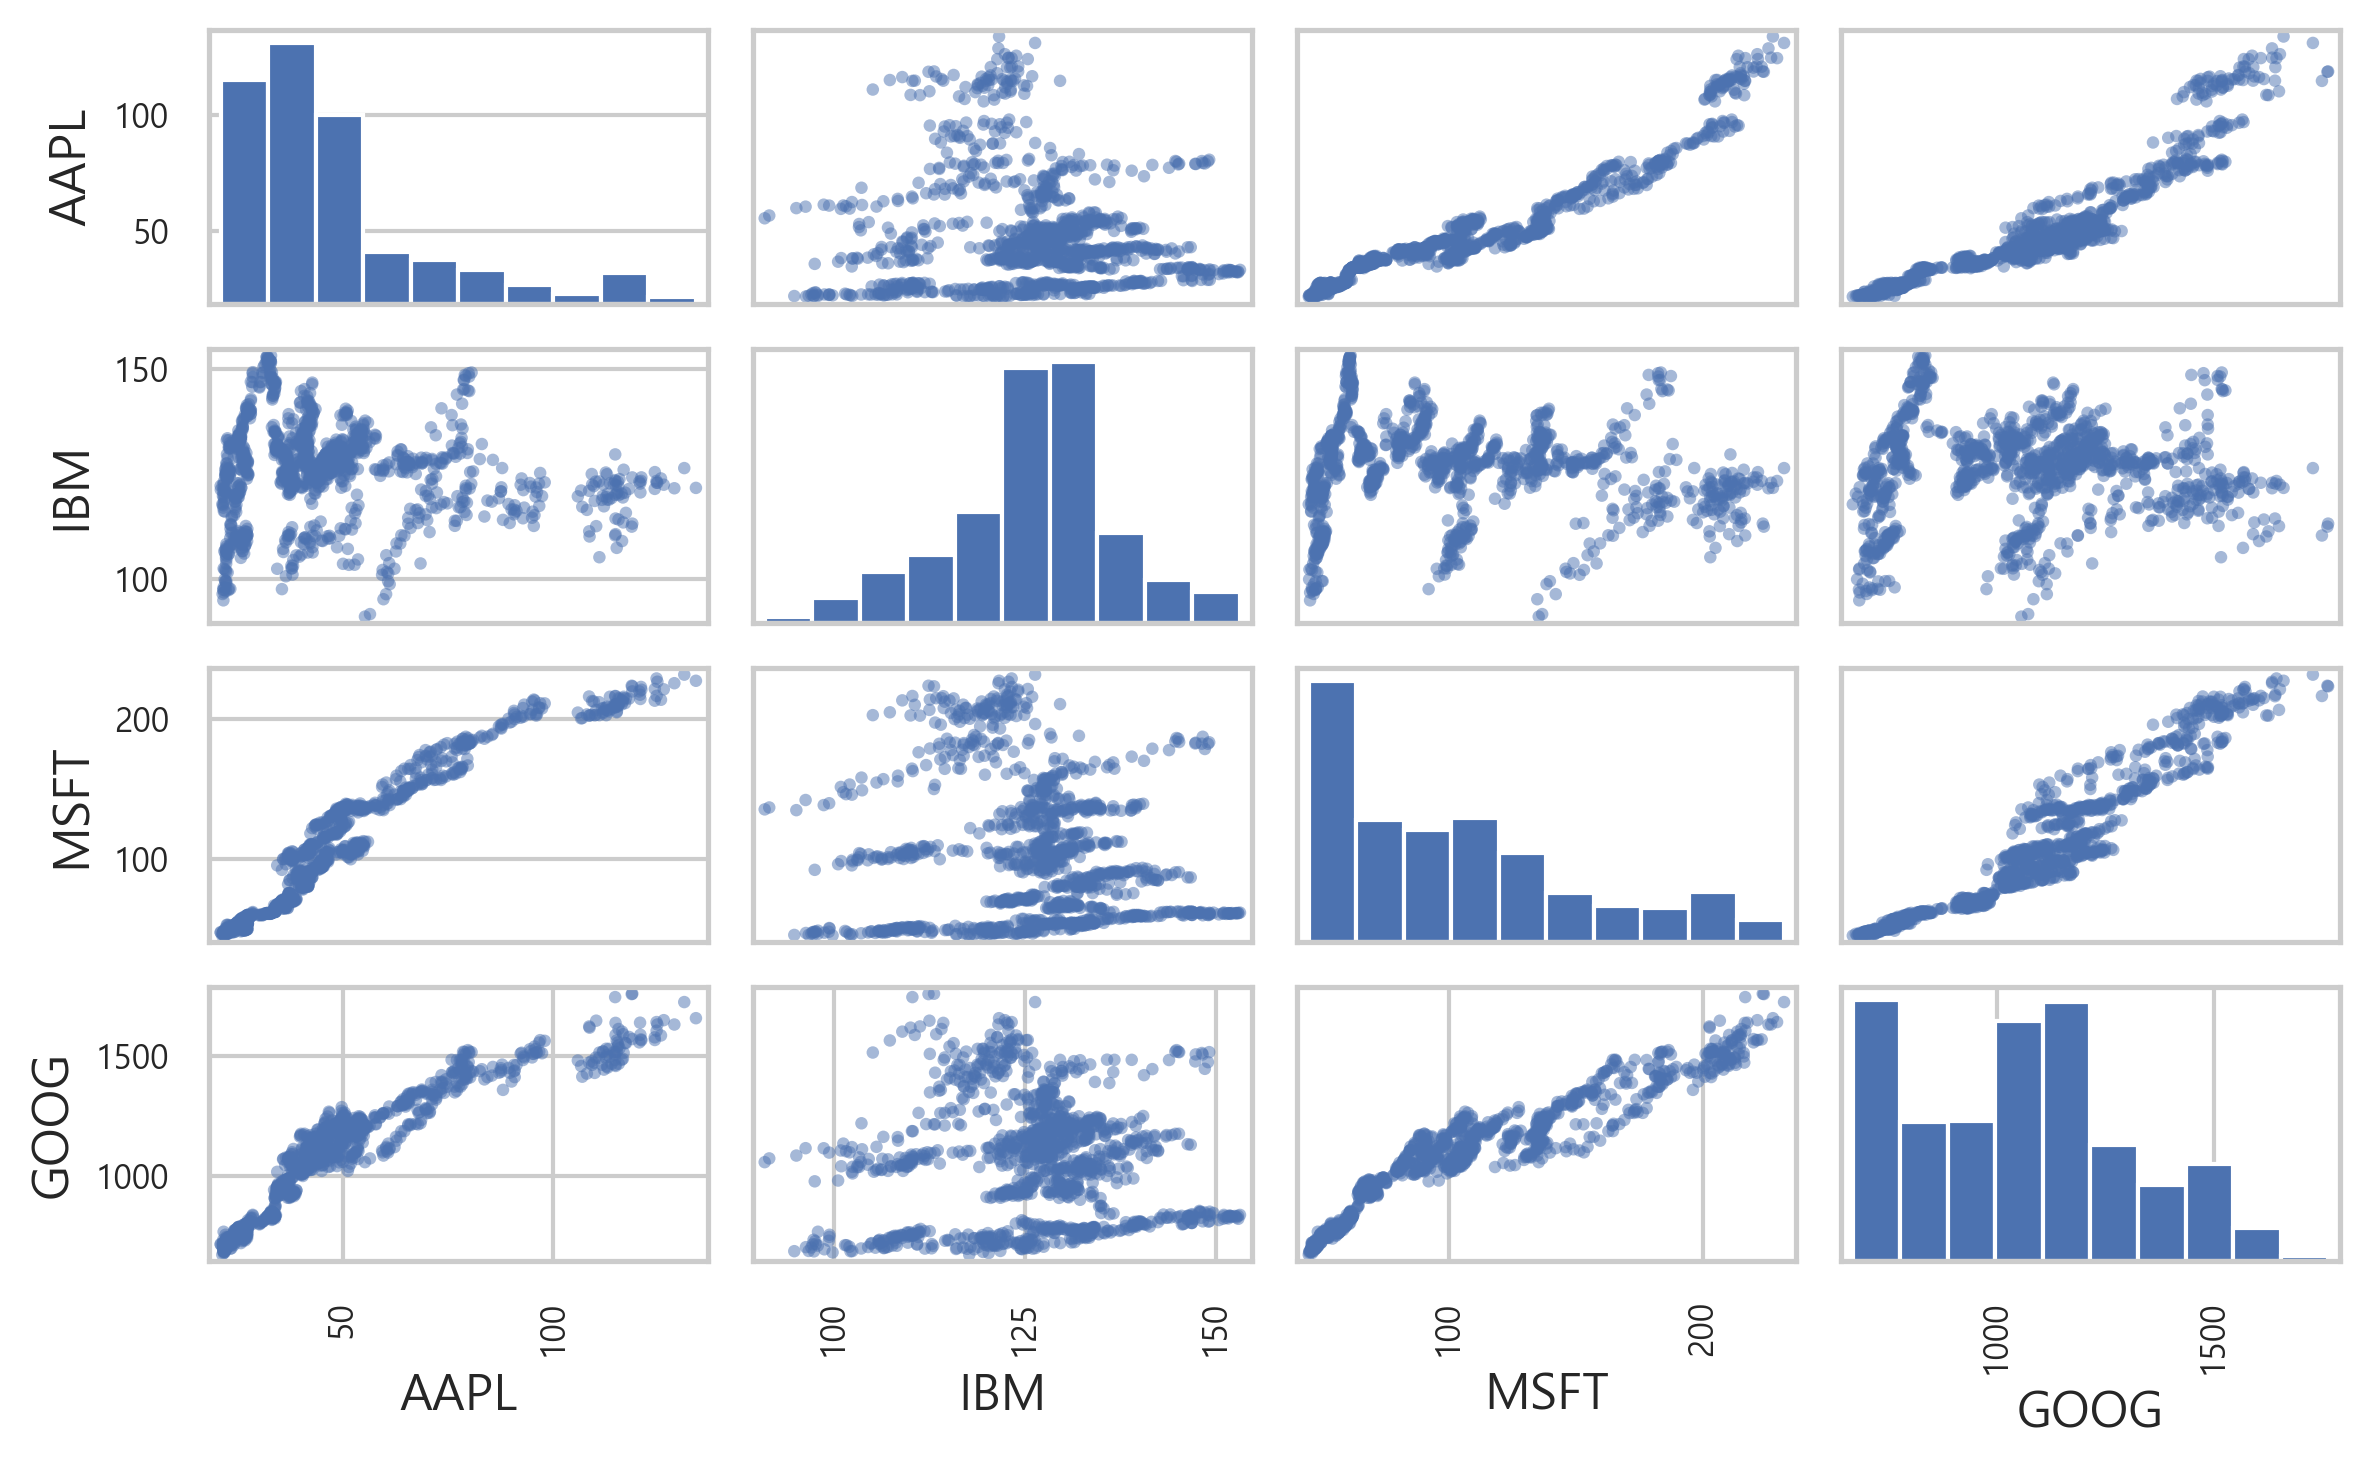

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.tight_layout()
plt.show()
plt.close()

#### Heatmaps

In [27]:
df.plot(kind='hexbin',x='width', y='length')
plt.show()
plt.close()

KeyError: 'width'

#### 시계열 데이터

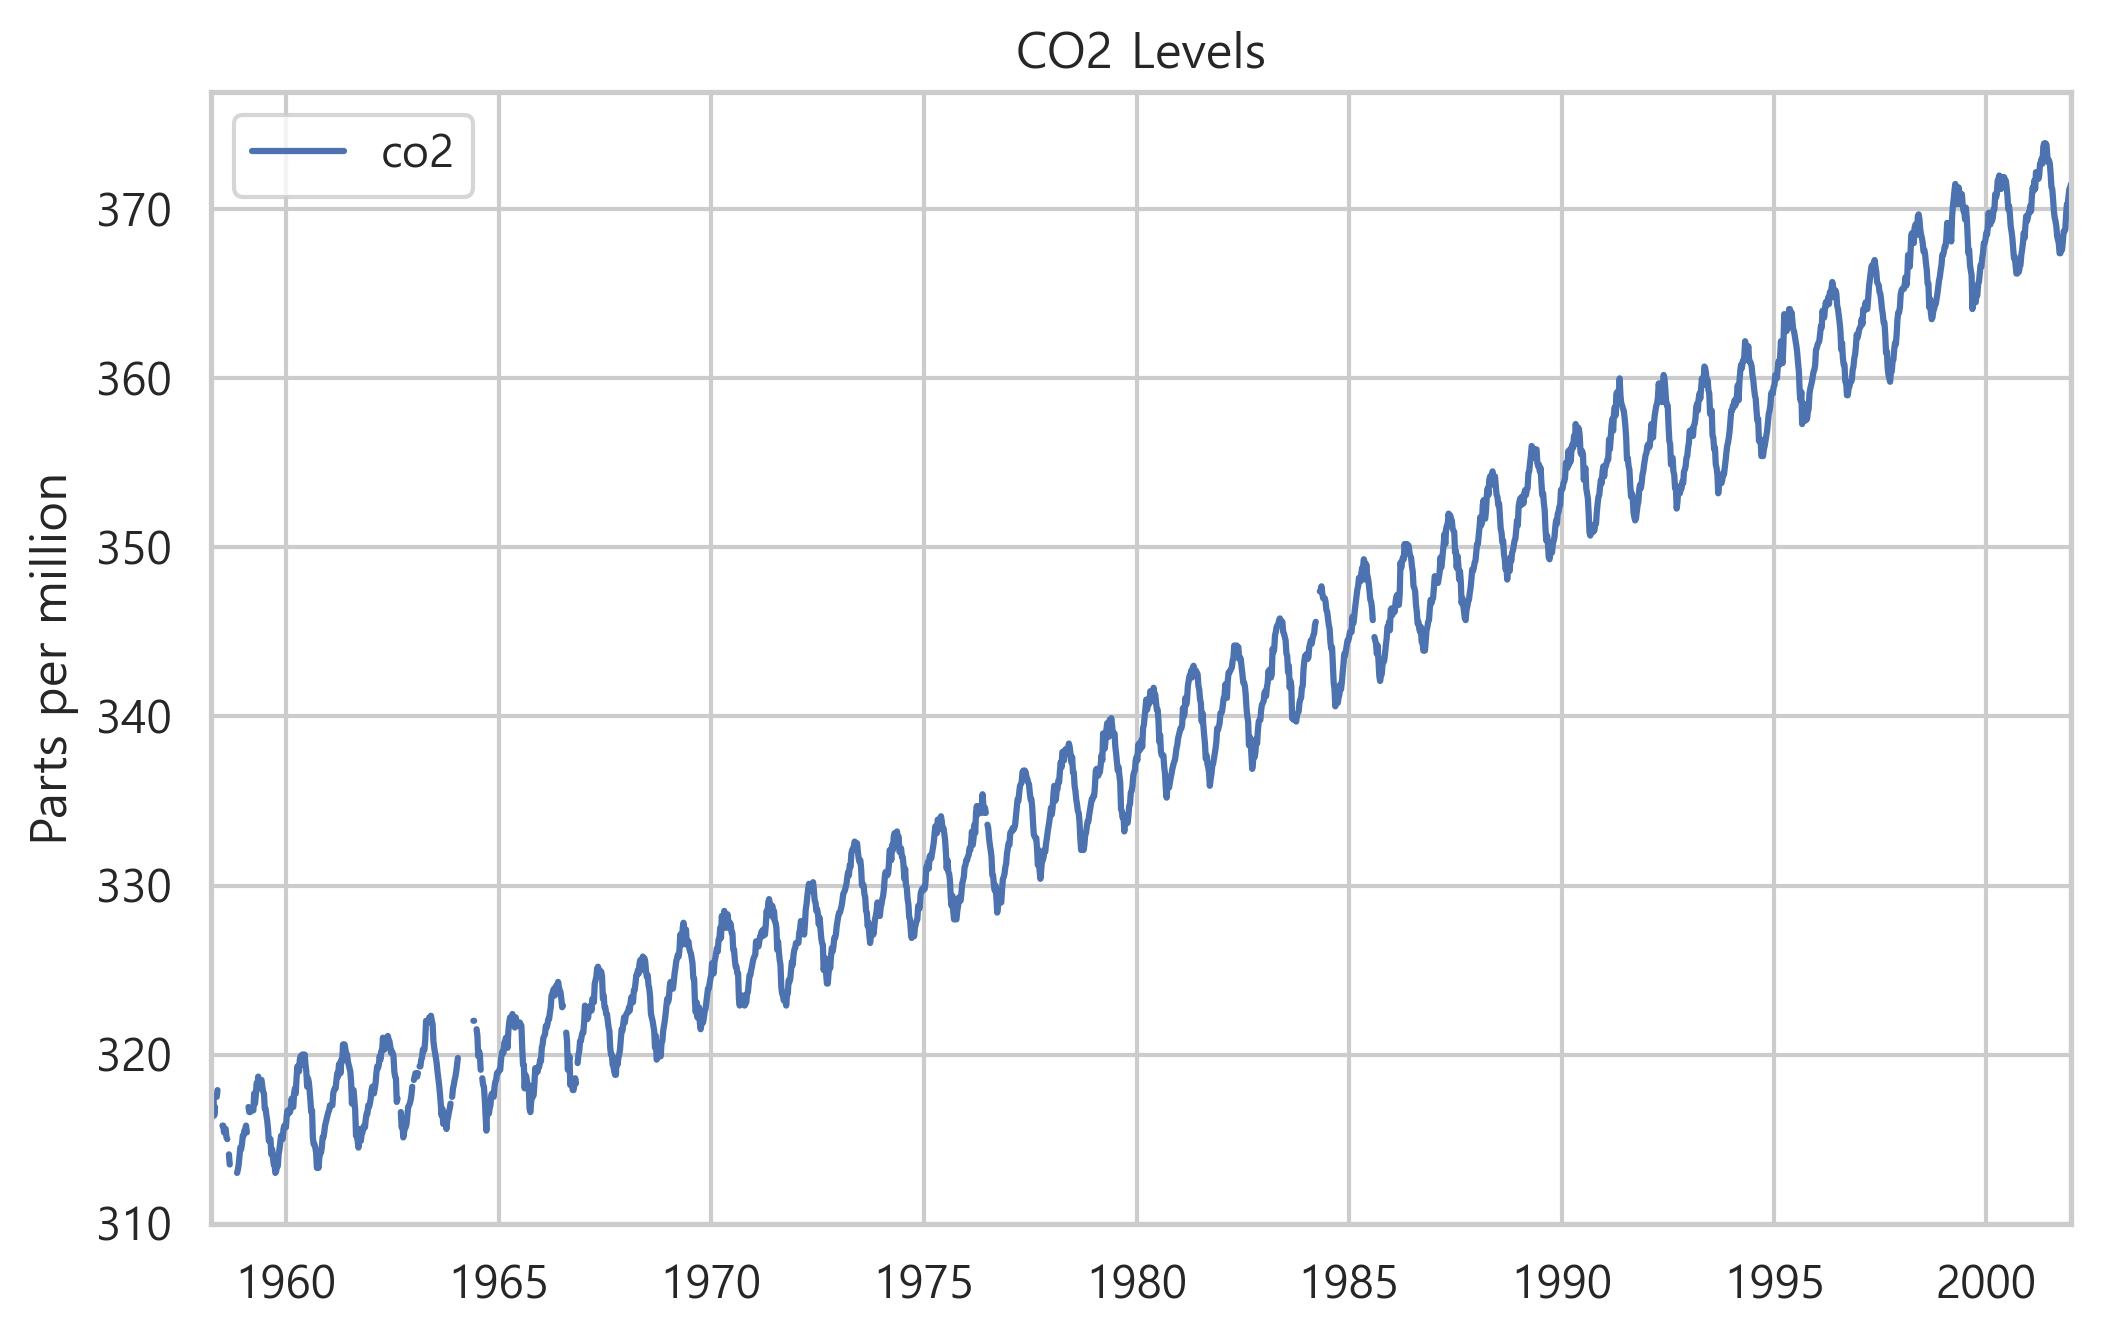

In [17]:
import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.show()